# EDA CASE STUDY NOTEBOOK
<b>Submitted By:</b>
- Anouska Patnaik
- CM Vijaya Kumar

# Problem statement:

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
- All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

-  <b>Approved: </b> The Company has approved loan Application
-  <b>Cancelled: </b> The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
-  <b>Refused: </b> The company had rejected the loan (because the client does not meet their requirements etc.).
-  <b>Unused offer: </b>  Loan has been cancelled by the client but on different stages of the process.

### Aim : 
 <b>This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected

### Datasets used:
1. <b>'application_data.csv'  </b>
- Contains all the information of the client at the time of application.
- The data is about whether a client has payment difficulties.

2.  <b>'previous_application.csv'  </b>
- Contains information about the client’s previous loan data. 
- It contains the data whether the previous application had been <b>Approved, Cancelled, Refused or Unused offer.

# -------------------------   -------------------------   -------------------------   --------------------------

#### Total dataframes used in the Notebook:
1. <b>app_data</b> - For the application data
2. <b>prev_data</b> - For the previous application data
3. <b>target_0_data</b> - Forapplication data belonging to target 0
4. <b>target_1_data</b> - Forapplication data belonging to target 1
5. <b>merged_data</b> - After merging application data and previous data
6. <b>corr_values</b> - Correlated values
7. <b>corr_values_0</b> - Correlated values target 0
8. <b>corr_values_1</b> - Correlated values target 1

# -------------------------   -------------------------   -------------------------   --------------------------

#### Importing the required libraries and Filtering out the warnings

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import *
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### We are having many rows in the datasets provided. Hence we are setting the max rows/columns (to be displayed in output)

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

### 1. Starting with reading the data

In [3]:
app_data = pd.read_csv("application_data.csv")

In [4]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 1.1 Understanding the data and its colums, rows, types of data, no of unique values in each column 

In [5]:
app_data.shape

(307511, 122)

In [6]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### Note:
As we have more number of columns than the max column limit(for info()), it doesn't display all the columns. So, we have used <b> verbose = True</b> which would display all columns and we need the individual null counts too, so we have used <b>null_counts = True<b/> 

In [7]:
app_data.info(verbose = True , null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [8]:
app_data.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

### 1.2 Finding and analyzing missing values in our data

<b>Note:</b>
We are finding percentage of the individual NaN counts of the columns and rounding them to 2 decimal points for better visibility. Then we are finding the counts of all missing percentages and no of colums associated

In [9]:
round(((app_data.isna().sum()/307510)*100),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

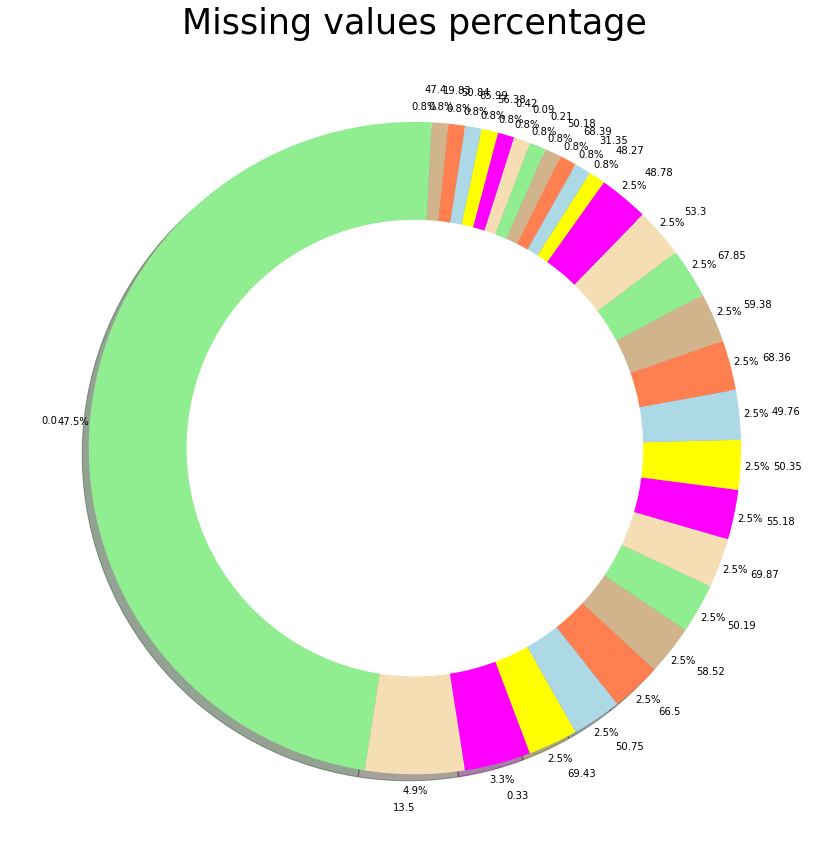

In [10]:
label = round(((app_data.isna().sum()/307510)*100),2).value_counts().index
plt.figure(figsize = [15,15])

plt.pie(round(((app_data.isna().sum()/307510)*100),2).value_counts() , labels = label,
         pctdistance=1.05 , 
        autopct="%.1f%%" , 
        shadow = True, 
        startangle=90 ,
       colors = ["lightgreen" , "wheat" , "magenta" , "yellow" ,"lightblue" , "coral", "tan"])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title("Missing values percentage", fontdict={'fontsize': 35, 'color' : 'black'} )

plt.show()

<b>Note:</b>
- We have so many columns with missing percentage more than 50%. 
- These are the columns that would hinder with our further analysis since there are more than 50% of missing values and imputing them might or might not be useful
- Considering this situation, let us ignore these columns and only take the columns that are having missing percentage less than or equal to 50%
- We would be left with 81 columns now; Let us analyze the data left with us

In [11]:
app_data = app_data.loc[:,(round(((app_data.isna().sum()/307510)*100),2) <= 50)]

In [12]:
app_data.shape

(307511, 81)

In [13]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [14]:
(round(((app_data.isna().sum()/307510)*100),2)).value_counts()

0.00     58
13.50     6
0.33      4
49.76     3
48.78     3
31.35     1
0.42      1
47.40     1
19.83     1
0.21      1
0.09      1
48.27     1
dtype: int64

### 1.3 Finding the best measures to impute the missing data

<b>Note:</b>
 Let us take the columns having missing data less than or equal to 14%. Making sure that we are not taking data with 0 missing values and rounding the result off to 2 decimal points for better visibility

In [15]:
round((app_data.loc[:,(round(((app_data.isna().sum()/307510)*100),2) <= 14) & (round(((app_data.isna().sum()/307510)*100),2) > 0)].describe()),2)

,AMT_GOODS_PRICE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307233.00,306851.00,306490.00,306490.00,306490.00,306490.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,538396.21,0.51,1.42,0.14,1.41,0.10,0.01,0.01,0.03,0.27,0.27,1.90
std,369446.46,0.19,2.40,0.45,2.38,0.36,0.08,0.11,0.20,0.92,0.79,1.87
min,40500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,238500.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,450000.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,679500.00,0.66,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,4050000.00,0.85,348.00,34.00,344.00,24.00,4.00,9.00,8.00,27.00,261.00,25.00


<b>Note:</b>
For imputing values into the missing columns,its advisable to use mean/median. Let us take up some columns and check their plots to analyze and see what values would be suitable for imputing

In [16]:
app_data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

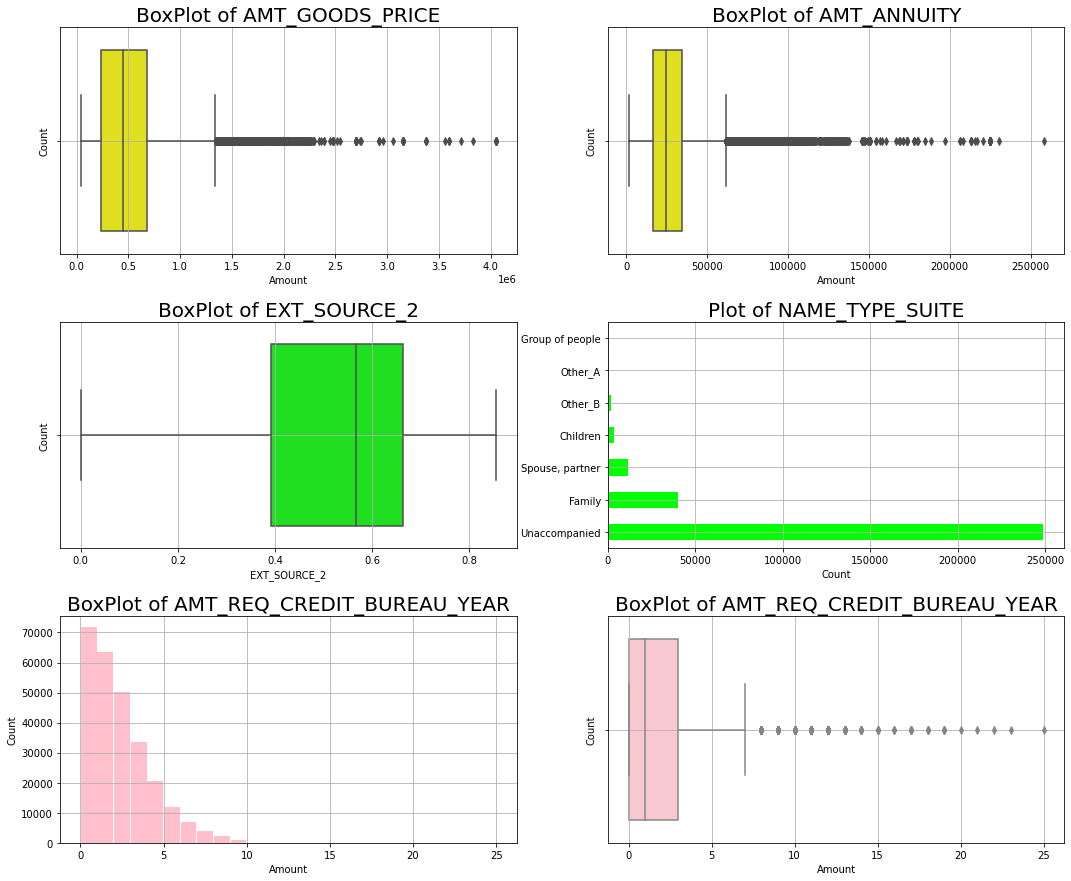

In [17]:
plt.figure(figsize = [18,15])
plt.subplots_adjust(hspace=0.3)

subplot(3,2,1)
sns.boxplot(app_data.AMT_GOODS_PRICE , color = "yellow")
plt.title("BoxPlot of AMT_GOODS_PRICE" , fontdict={'fontsize': 20, 'color' : 'black'})
plt.xlabel("Amount" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})

plt.grid()

subplot(3,2,2)
sns.boxplot(app_data.AMT_ANNUITY , color = "yellow")
plt.title("BoxPlot of AMT_ANNUITY" , fontdict={'fontsize': 20, 'color' : 'black'})
plt.xlabel("Amount" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})


plt.grid()

subplot(3,2,3)
sns.boxplot(app_data.EXT_SOURCE_2 , color = "lime")
plt.title("\nBoxPlot of EXT_SOURCE_2" , fontdict={'fontsize': 20, 'color' : 'black'})
plt.xlabel("EXT_SOURCE_2" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})


plt.grid()

subplot(3,2,4)
app_data.NAME_TYPE_SUITE.value_counts().plot.barh(color = "lime")
plt.title("\nPlot of NAME_TYPE_SUITE" , fontdict={'fontsize': 20, 'color' : 'black'})
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})

plt.grid()

subplot(3,2,5)
plt.hist(app_data.AMT_REQ_CREDIT_BUREAU_YEAR ,bins = 25 ,  color = "pink" ,  rwidth = 0.95)
plt.title("\nBoxPlot of AMT_REQ_CREDIT_BUREAU_YEAR" , fontdict={'fontsize': 20, 'color' : 'black'})
plt.xlabel("Amount" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})
plt.grid()

subplot(3,2,6)
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_YEAR ,  color = "pink")
plt.title("\nBoxPlot of AMT_REQ_CREDIT_BUREAU_YEAR" , fontdict={'fontsize': 20, 'color' : 'black'})
plt.xlabel("Amount" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 100, 'color' : 'Black'})

plt.grid()



plt.show()

#### Inferences:
- <b>AMT_GOODS_PRICE</b> - As it has great outliers in the values , <b>median</b> so we can impute outliers with median values.
- <b>AMT_ANNUITY</b> - As it has great outliers in the values , <b>median</b> so we can impute outliers with median values.
- <b>EXT_SOURCE_2</b> - It has no outliers so we can impute the columns using <b>mean</b>.
- <b>AMT_REQ_CREDIT_BUREAU_YEAR</b> - Since there are few outliers, we can impute with <b>mean</b>
- <b>NAME_TYPE_SUITE</b> - Since most of the data belongs to Unaccompanied, imputing the NaNs with Unaccompanied (<b>mode</b>) would be good and won't affect the data analysis


### 1.4 Examining and modifying the data in some columns

In [18]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

#### Inferences:

1. The following columns are having <b>Float</b> Data type while containing <b>Integer</b> Data. can be considered for <b>Datatype conversion</b> to reduce memory usage:
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR
- DAYS_LAST_PHONE_CHANGE
- DEF_30_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- OBS_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- CNT_FAM_MEMBERS

2. <b>Clubbing Columns:</b>
- The columns related to Flag Documents can be clubbed into one taking the total number of documents submitted to ease our understanding and data analysis
- The Flag columns for modes of communication can be clubbed in the same way

3. <b>Rectifying negative data:</b> Some data related to number of dates are present in negatives which can be rectified.


In [19]:
app_data.DAYS_BIRTH =  abs(app_data.DAYS_BIRTH)
app_data.DAYS_EMPLOYED = abs(app_data.DAYS_EMPLOYED)
app_data.DAYS_REGISTRATION = abs(app_data.DAYS_REGISTRATION)
app_data.DAYS_ID_PUBLISH = abs(app_data.DAYS_ID_PUBLISH)
app_data.DAYS_LAST_PHONE_CHANGE = abs(app_data.DAYS_LAST_PHONE_CHANGE)

In [20]:
app_data["TOT_DOCS_SUBMITTED"] = app_data.loc[:,"FLAG_DOCUMENT_2" : "FLAG_DOCUMENT_21"].sum(axis=1)
app_data["TOT_COMM_DETAILS"] = app_data.loc[:,"FLAG_MOBIL" : "FLAG_EMAIL"].sum(axis=1)

In [21]:
app_data.drop(app_data.loc[:,"FLAG_DOCUMENT_2" : "FLAG_DOCUMENT_21"] , axis = 1 , inplace = True)
app_data.drop(app_data.loc[:,"FLAG_MOBIL" : "FLAG_EMAIL"] , axis = 1 , inplace = True)
app_data.drop(["REGION_POPULATION_RELATIVE" ,"EXT_SOURCE_2" ,"EXT_SOURCE_3" ] , axis = 1 , inplace = True)
app_data.drop(app_data.loc[ : , "REG_REGION_NOT_LIVE_REGION":"LIVE_CITY_NOT_WORK_CITY" , ] , axis = 1 , inplace = True)
app_data.drop(app_data.loc[ : , "YEARS_BEGINEXPLUATATION_AVG":"TOTALAREA_MODE" , ] , axis = 1 , inplace = True)
app_data.drop(["HOUR_APPR_PROCESS_START" , "EMERGENCYSTATE_MODE" , "DAYS_ID_PUBLISH" ] , axis = 1 , inplace = True)

In [22]:
app_data.shape

(307511, 38)

### 1.5 Checking for outliers in our dataset

In [23]:
round(app_data.describe(),2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOT_DOCS_SUBMITTED,TOT_COMM_DETAILS
count,307511.00,307511.00,307511.00,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,306490.00,306490.00,306490.00,306490.00,307510.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00,307511.00,307511.00
mean,278180.52,0.08,0.42,1.687979e+05,599026.00,27108.57,538396.21,16037.00,67724.74,4986.12,2.15,2.05,2.03,1.42,0.14,1.41,0.10,962.86,0.01,0.01,0.03,0.27,0.27,1.90,0.93,3.36
std,102790.18,0.27,0.72,2.371231e+05,402490.78,14493.74,369446.46,4363.99,139443.75,3522.89,0.91,0.51,0.50,2.40,0.45,2.38,0.36,826.81,0.08,0.11,0.20,0.92,0.79,1.87,0.34,0.87
min,100002.00,0.00,0.00,2.565000e+04,45000.00,1615.50,40500.00,7489.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,189145.50,0.00,0.00,1.125000e+05,270000.00,16524.00,238500.00,12413.00,933.00,2010.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,274.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00
50%,278202.00,0.00,0.00,1.471500e+05,513531.00,24903.00,450000.00,15750.00,2219.00,4504.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,757.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00
75%,367142.50,0.00,1.00,2.025000e+05,808650.00,34596.00,679500.00,19682.00,5707.00,7479.50,3.00,2.00,2.00,2.00,0.00,2.00,0.00,1570.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,4.00
max,456255.00,1.00,19.00,1.170000e+08,4050000.00,258025.50,4050000.00,25229.00,365243.00,24672.00,20.00,3.00,3.00,348.00,34.00,344.00,24.00,4292.00,4.00,9.00,8.00,27.00,261.00,25.00,4.00,6.00


#### Note:
Let us now plot to see the outliers

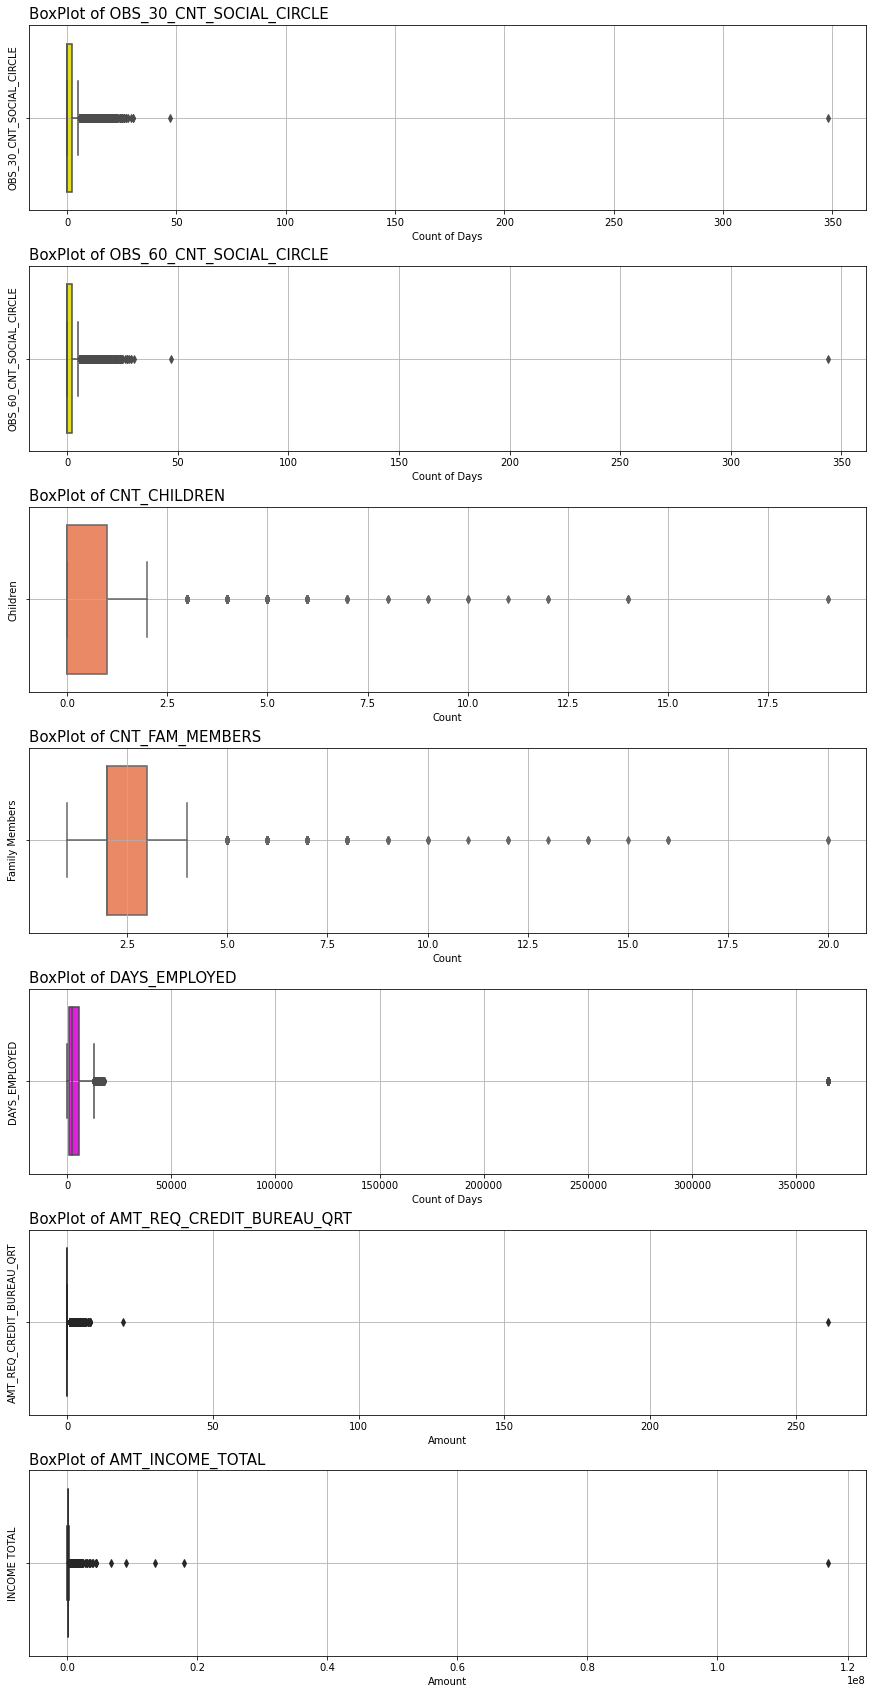

In [24]:
plt.figure(figsize = [15,30])
plt.subplots_adjust(hspace=0.3)

subplot(7,1,1)

sns.boxplot(app_data.OBS_30_CNT_SOCIAL_CIRCLE , color = "yellow")
plt.title("BoxPlot of OBS_30_CNT_SOCIAL_CIRCLE", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.ylabel("OBS_30_CNT_SOCIAL_CIRCLE" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count of Days" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(7,1,2)

sns.boxplot(app_data.OBS_60_CNT_SOCIAL_CIRCLE , color = "yellow")
plt.title("BoxPlot of OBS_60_CNT_SOCIAL_CIRCLE", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.ylabel("OBS_60_CNT_SOCIAL_CIRCLE" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count of Days" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(7,1,3)

sns.boxplot(app_data.CNT_CHILDREN , color = "coral")
plt.title("BoxPlot of CNT_CHILDREN", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.ylabel("Children" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(7,1,4)

sns.boxplot(app_data.CNT_FAM_MEMBERS , color = "coral")
plt.title("BoxPlot of CNT_FAM_MEMBERS", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.ylabel("Family Members" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(7,1,5)

sns.boxplot(app_data.DAYS_EMPLOYED , color = "magenta")
plt.title("BoxPlot of DAYS_EMPLOYED", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.ylabel("DAYS_EMPLOYED" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count of Days" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(7,1,6)

sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_QRT , color = "purple")
plt.title("BoxPlot of AMT_REQ_CREDIT_BUREAU_QRT", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.ylabel("AMT_REQ_CREDIT_BUREAU_QRT" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Amount" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(7,1,7)

sns.boxplot(app_data.AMT_INCOME_TOTAL , color = "teal")
plt.title("BoxPlot of AMT_INCOME_TOTAL", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.ylabel("INCOME TOTAL" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Amount" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.show()

#### Inferences:
1. For OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE - There exists one record with an extreme outlier which can be deleted to ease our data analysis
2. There are multiple records having Days_employed as 365243 which is an extreme outlier but it can't be ignored as the amount of records is quite significant
3. Count of Family Members and Children that are related and are having outliers where the count is more than 4 and 2 respectively

In [25]:
app_data[app_data.OBS_60_CNT_SOCIAL_CIRCLE > 30]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOT_DOCS_SUBMITTED,TOT_COMM_DETAILS
77497,189856,0,Cash loans,M,Y,Y,1,157500.0,296280.0,23539.5,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,14767,2767,13306.0,Laborers,3.0,2,2,MONDAY,Industry: type 4,47.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,4
148403,272071,0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,10111,1917,2306.0,Core staff,1.0,3,3,THURSDAY,Police,348.0,34.0,344.0,24.0,667.0,0.0,0.0,1.0,1.0,0.0,3.0,0,3


In [26]:
app_data[app_data.AMT_INCOME_TOTAL >20000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOT_DOCS_SUBMITTED,TOT_COMM_DETAILS
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,12615,922,6762.0,Laborers,3.0,2,2,TUESDAY,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3


In [27]:
app_data[app_data.AMT_REQ_CREDIT_BUREAU_QRT >250]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOT_DOCS_SUBMITTED,TOT_COMM_DETAILS
239474,377322,0,Cash loans,F,N,Y,1,360000.0,1035000.0,30393.0,1035000.0,Unaccompanied,Working,Higher education,Married,House / apartment,13590,3336,3629.0,Accountants,3.0,2,2,MONDAY,Business Entity Type 2,3.0,0.0,3.0,0.0,695.0,0.0,0.0,0.0,1.0,261.0,0.0,1,4


In [28]:
app_data[app_data.DAYS_EMPLOYED == app_data.DAYS_EMPLOYED.max()].shape

(55374, 38)

### 1.6: Binning some columns

<b>Note:</b>
There are certain columns that contain data which can be put into bins for better understanding of data.
We are here binning 4 columns

In [29]:
app_data.AMT_ANNUITY.quantile([0.2 , 0.5, 0.7, 0.9, 0.95 , 0.99])

0.20    14701.5
0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [30]:
app_data.AMT_INCOME_TOTAL.quantile([0.2 , 0.5, 0.7, 0.9, 0.95 , 0.99])

0.20     99000.0
0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [31]:
((app_data.DAYS_BIRTH)/365).quantile([0.1 , 0.2 , 0.5, 0.7, 0.9, 0.95 , 0.99])

0.10    28.175342
0.20    32.038356
0.50    43.150685
0.70    51.739726
0.90    60.769863
0.95    63.572603
0.99    66.901370
Name: DAYS_BIRTH, dtype: float64

In [32]:
app_data.AMT_CREDIT.quantile([0.2 , 0.5, 0.7, 0.9, 0.95 , 0.99])

0.20     254700.0
0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [33]:
app_data["AMT_ANNUITY_RANGE"] = pd.cut(app_data.AMT_ANNUITY , bins = [14701.5 , 24903.0 , 32004.0 , 45954.0 , 53325.0 , 70006.5] , 
                                  labels = ["Very Low" , "Low" , "Medium" , "High" , "Very High"])
app_data["AMT_INCOME_RANGE"] = pd.cut(app_data.AMT_INCOME_TOTAL , bins = [99000.0 , 147150.0 , 180000.0 , 270000.0 , 337500.0 , 472500.0 ] , 
                                  labels = ["Very Low" , "Low" , "Medium" , "High" , "Very High"])
app_data["AGE_RANGE"] = pd.cut((app_data.DAYS_BIRTH)/365 , bins = [0,30,40,50,60,99] ,
                           labels = ["<30Y" , "30-40" , "40-50" , "50-60" , "60+"] )
app_data['AMT_CREDIT_RANGE'] = pd.cut(app_data.AMT_CREDIT , bins = [254700.0 , 513531.0 , 755190.0 , 1133748.0 , 1350000.0 , 1854000.0] , 
                                   labels=["Very Low" , "Low" , "Medium" , "High" , "Very High"])

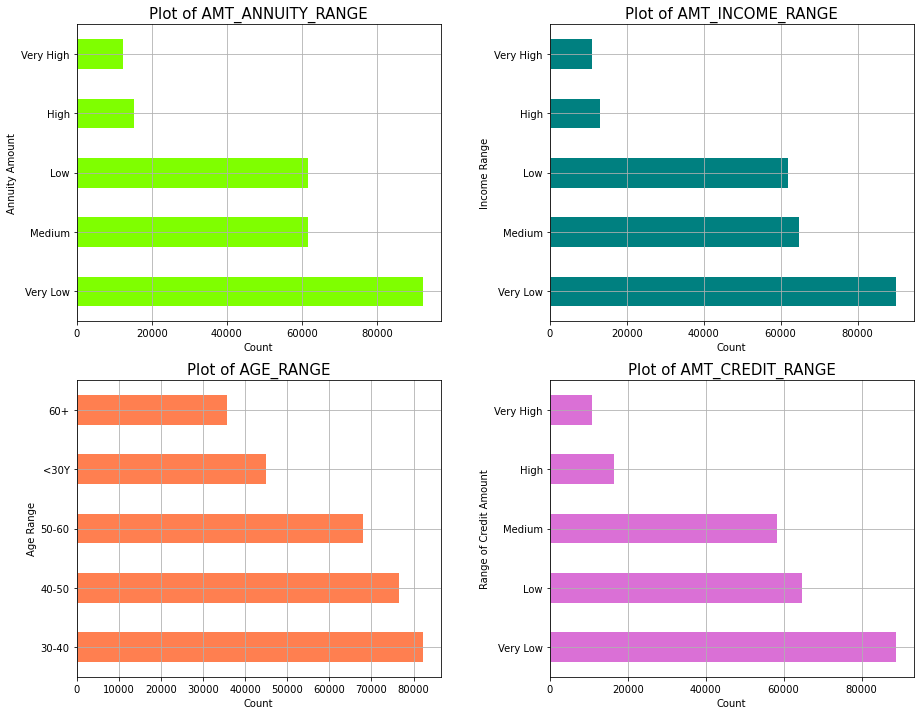

In [34]:
plt.figure(figsize = [15,12])
plt.subplots_adjust(wspace=0.3)

subplot(2,2,1)

app_data["AMT_ANNUITY_RANGE"].value_counts().plot.barh(color = "chartreuse")
plt.title("Plot of AMT_ANNUITY_RANGE", fontdict={'fontsize': 15, 'color' : 'black'})
plt.ylabel("Annuity Amount" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(2,2,2)

app_data["AMT_INCOME_RANGE"].value_counts().plot.barh(color = "teal")
plt.title("Plot of AMT_INCOME_RANGE", fontdict={'fontsize': 15, 'color' : 'black'})
plt.ylabel("Income Range" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count",  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()


subplot(2,2,3)

app_data["AGE_RANGE"].value_counts().plot.barh(color = "coral")
plt.title("Plot of AGE_RANGE", fontdict={'fontsize': 15, 'color' : 'black'})
plt.ylabel("Age Range" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()


subplot(2,2,4)

app_data["AMT_CREDIT_RANGE"].value_counts().plot.barh(color = "orchid")
plt.title("Plot of AMT_CREDIT_RANGE", fontdict={'fontsize': 15, 'color' : 'black'})
plt.ylabel("Range of Credit Amount" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()


plt.show()

<b>Note:</b>
Here we have made bins for the columns as:
- Age Groups for DAYS_BIRTH
- Amount range for AMT_ANNUITY
- Amount Range for AMT_CREDIT
- Amount range for AMT_INCOME_TOTAL

## 2. Analyzing the Data

### 2.1 Checking the imbalance percentage

#### Note:
Let us consider the column <b> Target</b>. 
- 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
- 0 - all other cases

In [35]:
app_data.TARGET.value_counts(normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

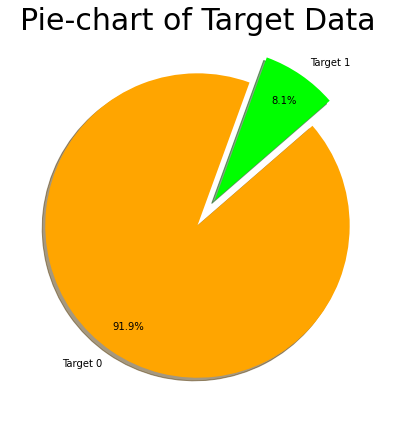

In [36]:
plt.figure(figsize=[7,7])

plt.pie(app_data.TARGET.value_counts() , labels = ["Target 0" , "Target 1"],
        explode = [0 , 0.2] , pctdistance=0.8 ,
        colors = ["orange" , "lime"] , 
        autopct="%.1f%%" , 
        shadow = True, 
        startangle=70)
plt.title("Pie-chart of Target Data", fontdict={'fontsize': 30, 'color' : 'black'})


plt.show()

- Here we can see that most of the data is for Target 0 which means most clients (91.92%) don't have payment difficulties while the rest are facing some or the other payment difficulties.
- Let us now segregate the data into two new dataframes as per Target column

In [37]:
target_1_data = app_data[app_data["TARGET"]==1]
target_0_data = app_data[app_data["TARGET"]==0]

In [38]:
app_data.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
AMT_CREDIT_RANGE                    5
NAME_EDUCATION_TYPE                 5
TOT_DOCS_SUBMITTED                  5
AMT_REQ_CREDIT_BUREAU_HOUR          5
AMT_ANNUITY_RANGE                   5
AMT_INCOME_RANGE                    5
AGE_RANGE                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
TOT_COMM_DETAILS                    6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMB

### 2.2  Analysis on the data

### 2.2.1 Univariate Analysis on the categorical data

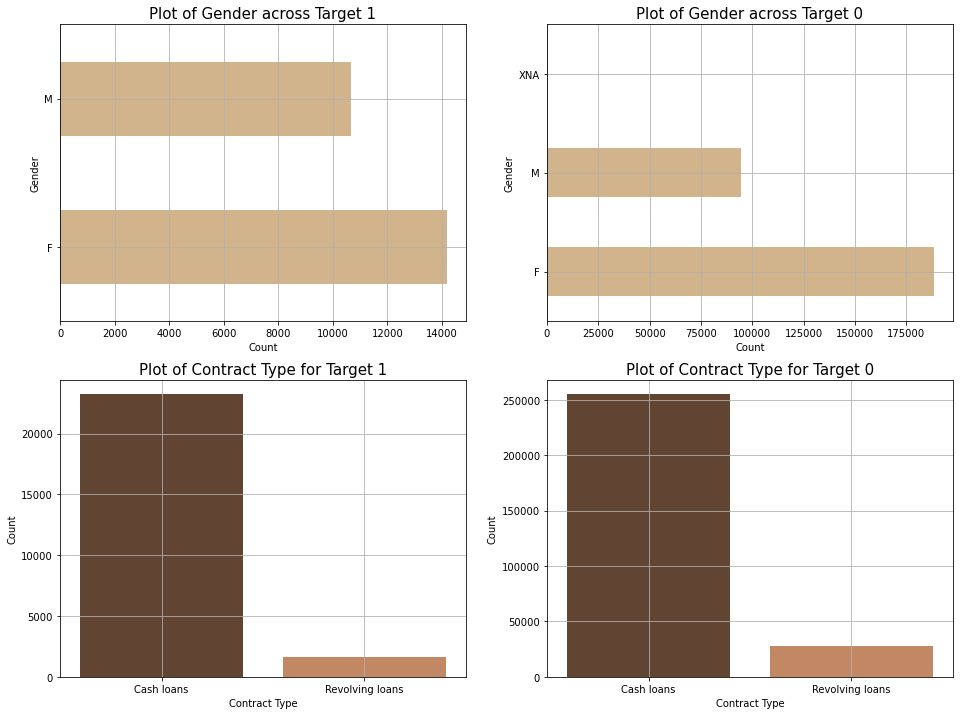

In [39]:
plt.figure(figsize=[16,12])

plt.subplot(2,2,1)
target_1_data['CODE_GENDER'].value_counts().plot.barh(color = "tan")
plt.title("Plot of Gender across Target 1", fontdict={'fontsize': 15, 'color' : 'black'})
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Gender" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(2,2,2)
target_0_data['CODE_GENDER'].value_counts().plot.barh(color = "tan")
plt.title("Plot of Gender across Target 0", fontdict={'fontsize': 15, 'color' : 'black'})
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Gender" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

plt.grid()

plt.subplot(2,2,3)
sns.countplot(target_1_data['NAME_CONTRACT_TYPE'] , palette = "copper")
plt.title("Plot of Contract Type for Target 1", fontdict={'fontsize': 15, 'color' : 'black'})

plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Contract Type" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

plt.grid()

plt.subplot(2,2,4)
sns.countplot(target_0_data['NAME_CONTRACT_TYPE'] , palette = "copper")
plt.title("Plot of Contract Type for Target 0", fontdict={'fontsize': 15, 'color' : 'black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel("Contract Type" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

plt.grid()




plt.show()


- Here we can see for <b> Gender </b> there's another data - <b>"XNA"</b> about which we are not sure if that's NaN or it means the option "Prefer Not to Say"
- We can see that the count of females is higher than Males irrespective of having payment difficulties or not
- The amount of <b>Cash Loans</b> given is visibly more than <b>Revolving loans</b> in both cases.

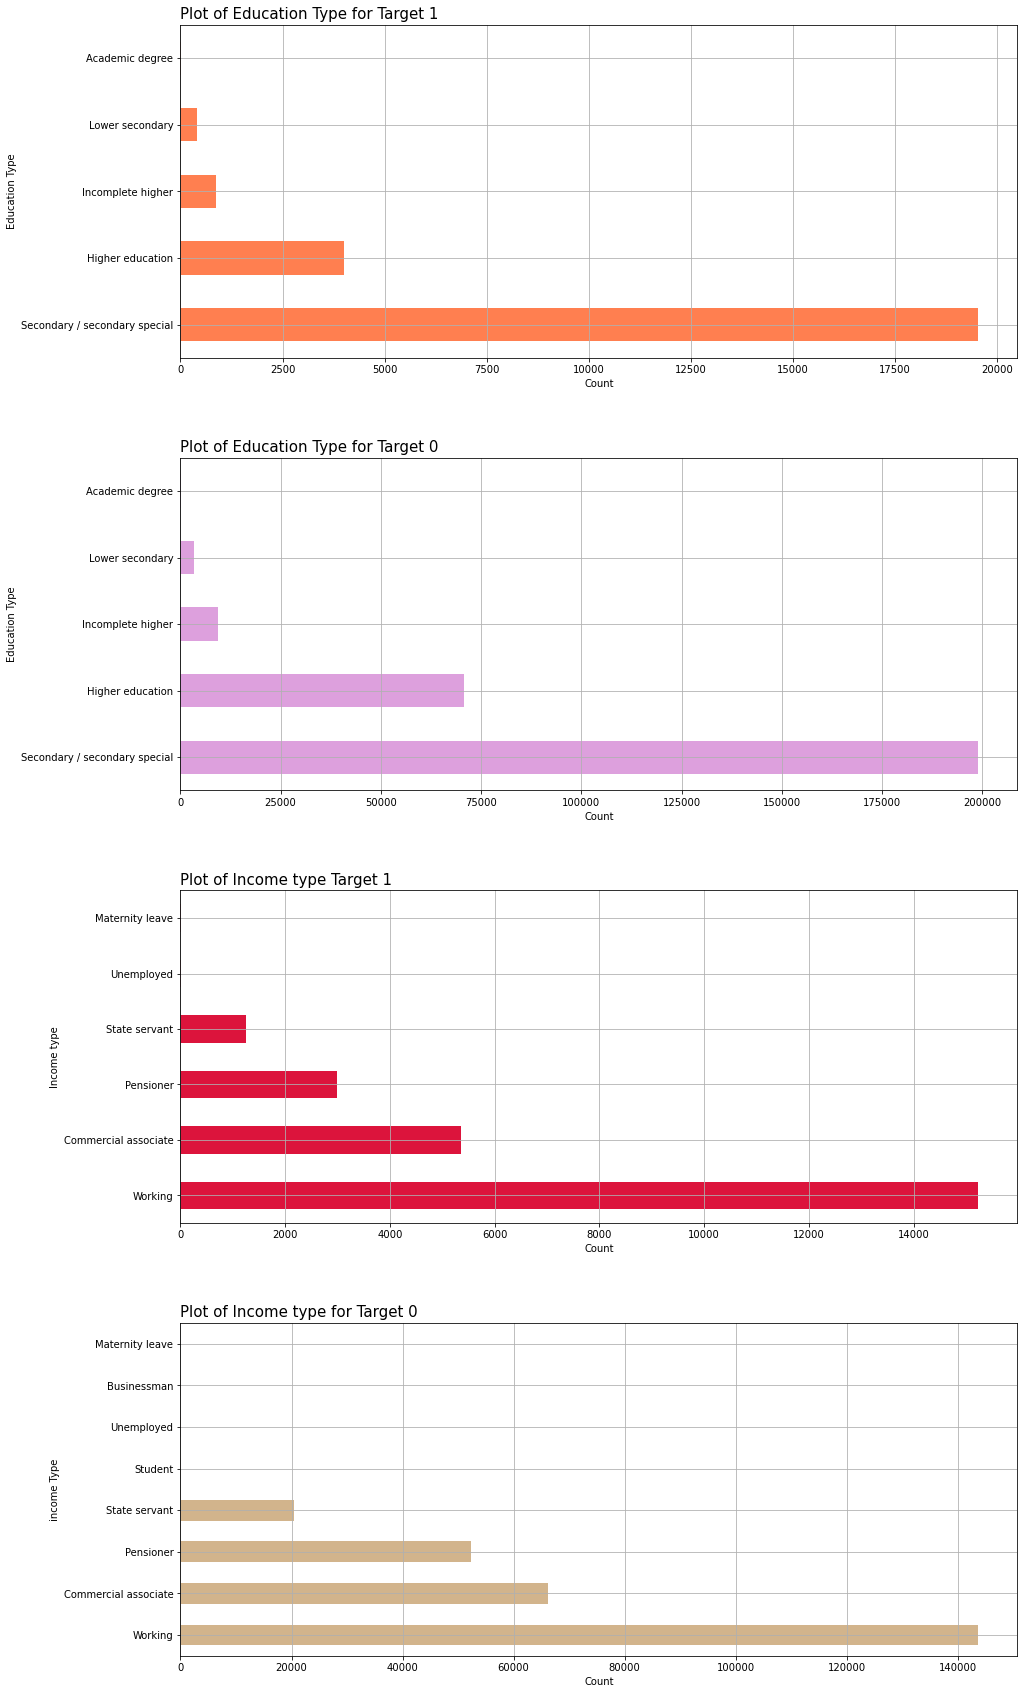

In [40]:
plt.figure(figsize=[15,30])
plt.subplots_adjust(hspace=0.3)

plt.subplot(4,1,1)
target_1_data['NAME_EDUCATION_TYPE'].value_counts().plot.barh(color = "coral")
plt.title("Plot of Education Type for Target 1", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Education Type" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

plt.grid()

plt.subplot(4,1,2)
target_0_data['NAME_EDUCATION_TYPE'].value_counts().plot.barh(color = "plum")
plt.title("Plot of Education Type for Target 0", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Education Type" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

plt.grid()

plt.subplot(4,1,3)
target_1_data['NAME_INCOME_TYPE'].value_counts().plot.barh(color = "crimson")
plt.title("Plot of Income type Target 1", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Income type" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

plt.grid()

plt.subplot(4,1,4)
target_0_data['NAME_INCOME_TYPE'].value_counts().plot.barh(color = "tan")
plt.title("Plot of Income type for Target 0", fontdict={'fontsize': 15, 'color' : 'black'} , loc='left')
plt.xlabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("income Type" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

plt.grid()

- Here we can see that a high number of people having <b>Seconday/Secondary Special</b> education type have the most number of applications followed by people having completed <b>higher education</b>
- <b>Students</b> , <b>Businessmen</b> are not likely to fall under Payment issues ie Target 1.
- Most of the <b>Working</b> people are most likely to apply for the loans irrespective of havibg payment issues or not
- <b>Maternity Leave</b> customners are least likely to apply for the loans


### 2.2.2 Univariate Analysis for Continuous Data

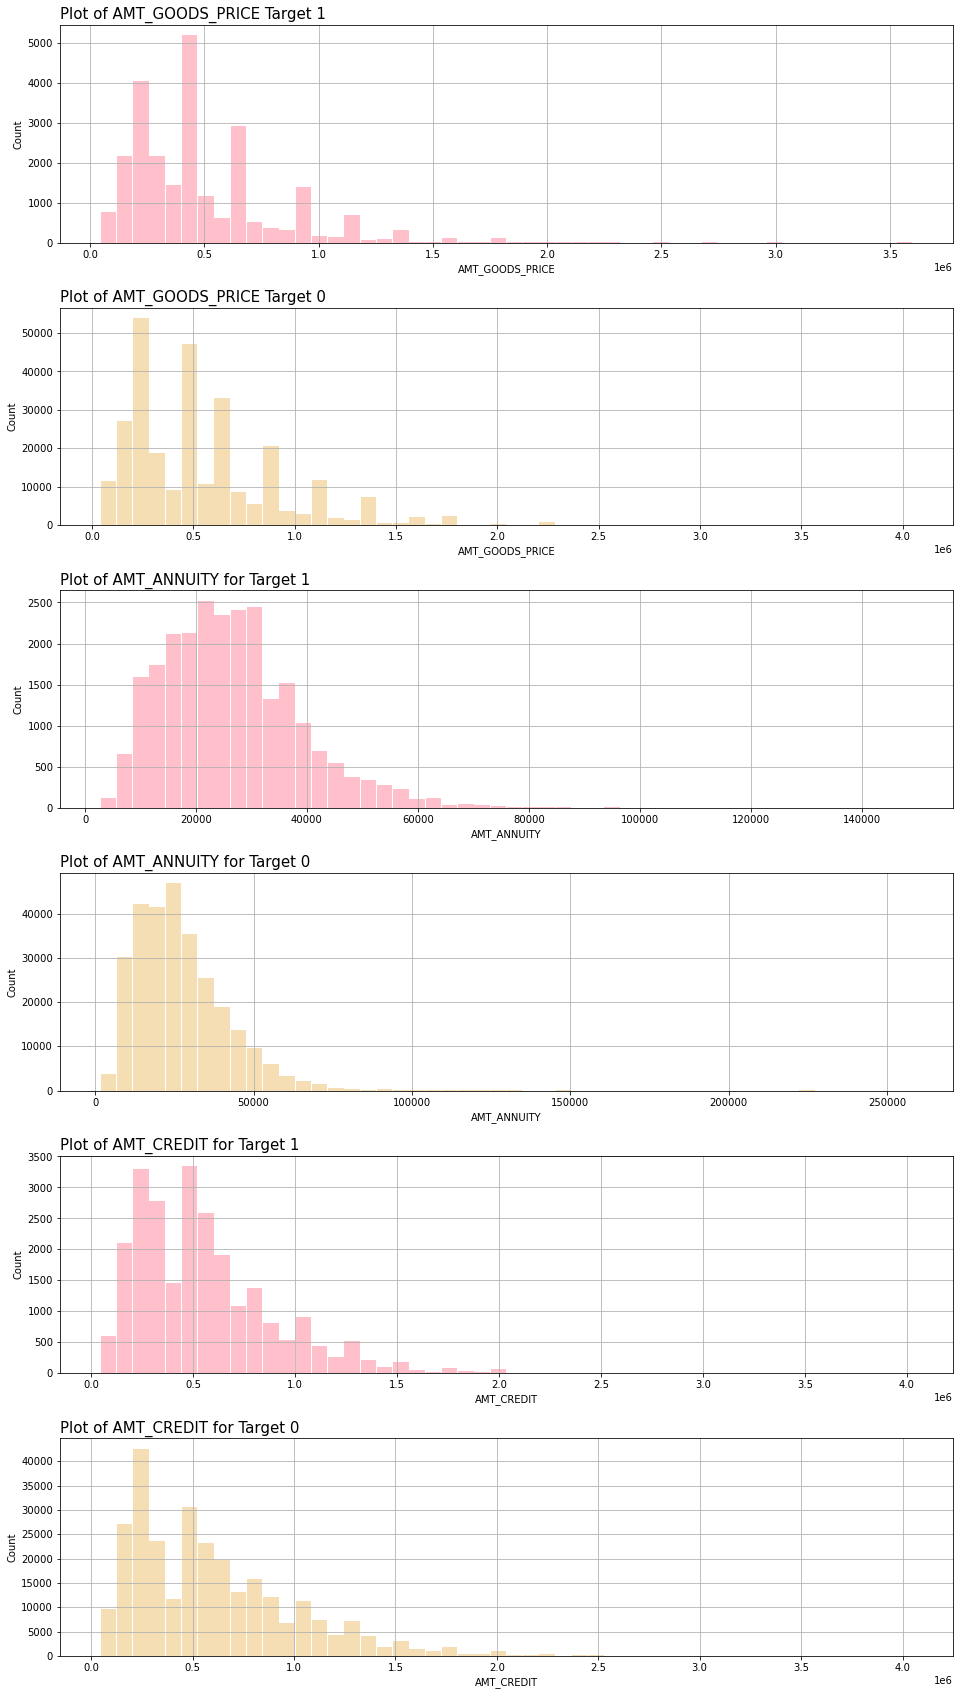

In [41]:
plt.figure(figsize=[16,30])
plt.subplots_adjust(hspace=0.3)


subplot(6,1,1)
plt.hist(target_1_data['AMT_GOODS_PRICE'] , bins = 50 , color = "pink" , rwidth = 0.95)
plt.title("Plot of AMT_GOODS_PRICE Target 1", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_GOODS_PRICE" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(6,1,2)
plt.hist(target_0_data['AMT_GOODS_PRICE'] , bins = 50 , color = "wheat" , rwidth = 0.95)
plt.title("Plot of AMT_GOODS_PRICE Target 0", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_GOODS_PRICE" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(6,1,3)
plt.hist(target_1_data['AMT_ANNUITY'] , bins = 50 , color = "pink" , rwidth = 0.95)
plt.title("Plot of AMT_ANNUITY for Target 1", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_ANNUITY" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(6,1,4)
plt.hist(target_0_data['AMT_ANNUITY'] , bins = 50 , color = "wheat" , rwidth = 0.95)
plt.title("Plot of AMT_ANNUITY for Target 0", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_ANNUITY" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(6,1,5)
plt.hist(target_1_data['AMT_CREDIT'] , bins = 50 , color = "pink" , rwidth = 0.95)
plt.title("Plot of AMT_CREDIT for Target 1", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_CREDIT" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(6,1,6)
plt.hist(target_0_data['AMT_CREDIT'] , bins = 50 , color = "wheat" , rwidth = 0.95)
plt.title("Plot of AMT_CREDIT for Target 0", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_CREDIT" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.show()

- Here we have taken histogram plots for the continuous variables for Amounts. We can note that for both the Targets, the amounts are most likely to lie in a certain range having outliers in the higher ranges 

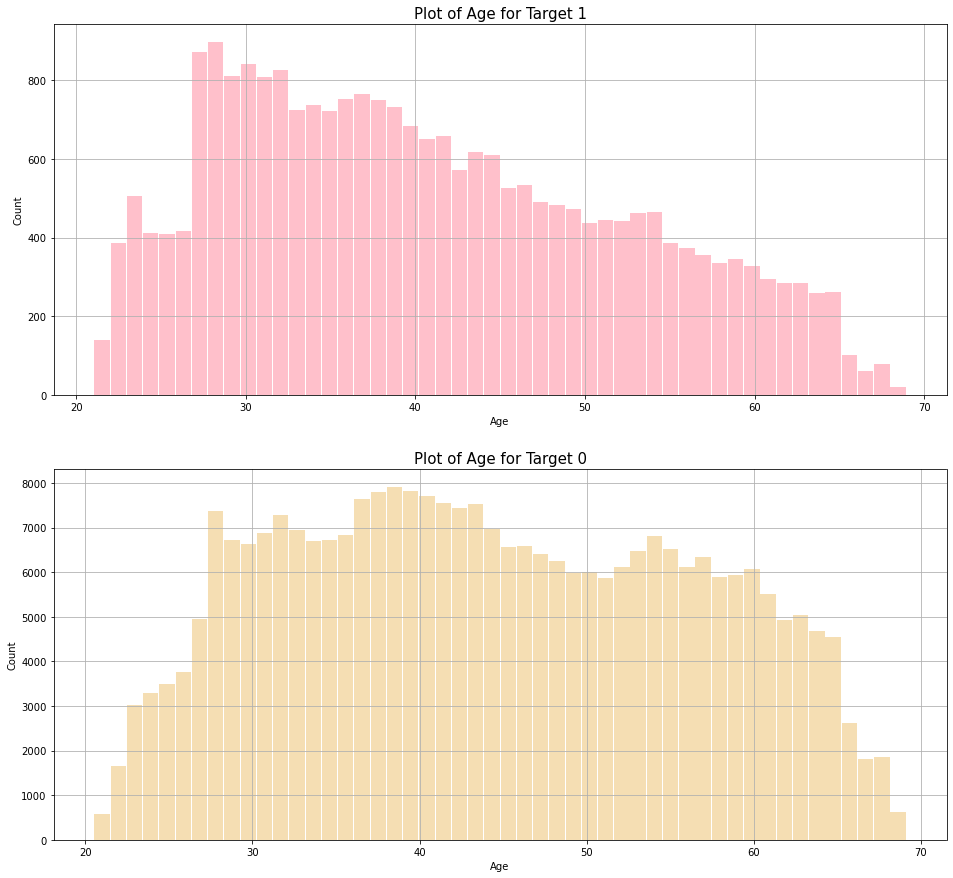

In [42]:
plt.figure(figsize=[16,15])

subplot(2,1,1)
plt.hist(target_1_data['DAYS_BIRTH']/365 , bins = 50 , color = "pink" , rwidth = 0.95)
plt.title("Plot of Age for Target 1", fontdict={'fontsize': 15, 'color' : 'black'})
plt.xlabel("Age" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(2,1,2)
plt.hist(target_0_data['DAYS_BIRTH']/365 , bins = 50 , color = "wheat" , rwidth = 0.95)
plt.title("Plot of Age for Target 0", fontdict={'fontsize': 15, 'color' : 'black'})
plt.xlabel("Age" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.show()

- People falling under <b>Target - 1</b> are most likely to be of the age 25-35, ie most likely to be having issues with payment
- People falling under <b>Target - 0</b> are most likely to be of the age 27-60 which signifies that age has a relation between the ability to make the payment|
- With increasing ages, people are most likely to be able to make payment with no issues
- We can see the sharp decrease in count of people as ages increase for people falling under Target 1 

### 2.2.3 Bivariate Analysis for Continuous ~ Categorical Data

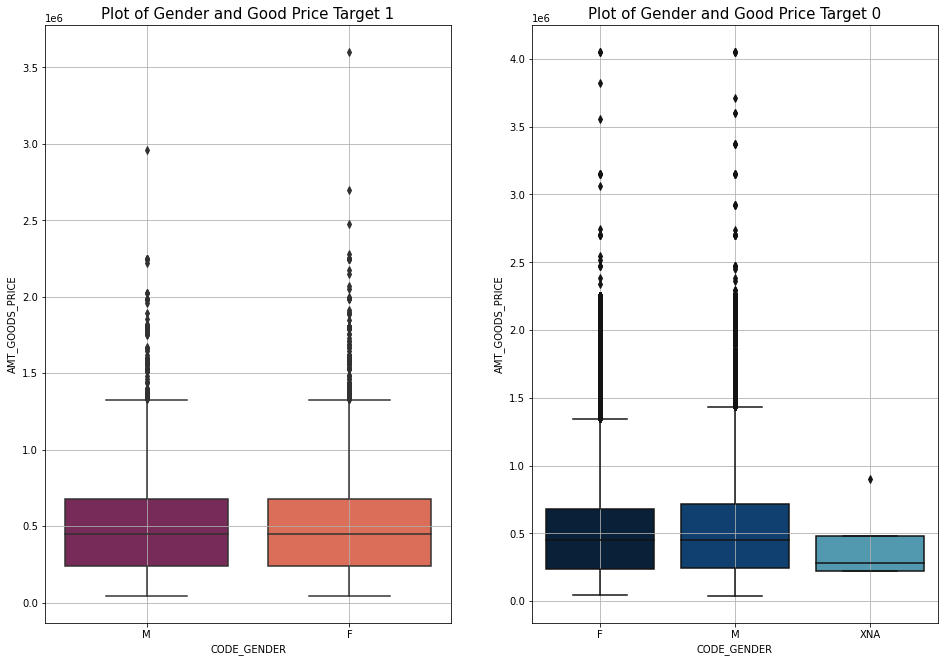

In [43]:
plt.figure(figsize=[16,11])

plt.subplot(1,2,1)
plt.title("Plot of Gender and Good Price Target 1" , fontdict={'fontsize': 15, 'color' : 'black'})
sns.boxplot(x = "CODE_GENDER" , y = "AMT_GOODS_PRICE" , data = target_1_data , palette = "rocket")
plt.grid()

plt.subplot(1,2,2)
plt.title("Plot of Gender and Good Price Target 0" , fontdict={'fontsize': 15, 'color' : 'black'})
sns.boxplot(x = "CODE_GENDER" , y = "AMT_GOODS_PRICE" , data = target_0_data ,  palette = 'ocean')
plt.grid()

plt.show()

- Here we can see that Males in target - 0 category are most likely to have more price of goods
- Its almost the same for both males and females of Target 1 to have the similar counts and many outliers for Goods price

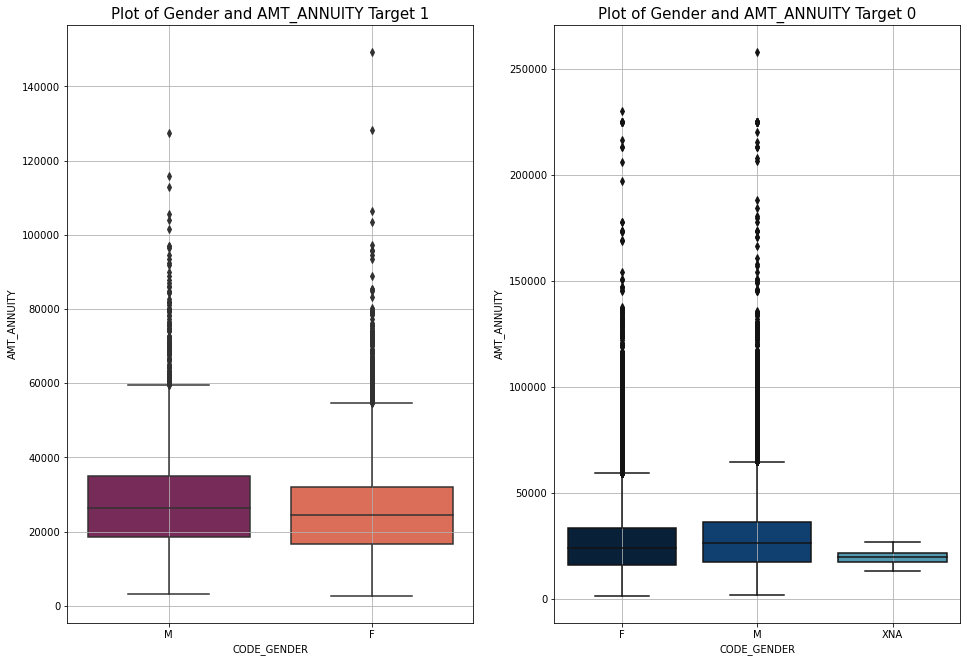

In [44]:
plt.figure(figsize=[16,11])

plt.subplot(1,2,1)
plt.title("Plot of Gender and AMT_ANNUITY Target 1" , fontdict={'fontsize': 15, 'color' : 'black'})
sns.boxplot(x = "CODE_GENDER" , y = "AMT_ANNUITY" , data = target_1_data , palette = "rocket")
plt.grid()

plt.subplot(1,2,2)
plt.title("Plot of Gender and AMT_ANNUITY Target 0" , fontdict={'fontsize': 15, 'color' : 'black'})
sns.boxplot(x = "CODE_GENDER" , y = "AMT_ANNUITY" , data = target_0_data ,  palette = 'ocean')
plt.grid()

plt.show()

- Here we can clearly see that for males and females with target 1, the maximun Amount Annuity went upto 140000+ while for the Target 0 males and females, there are many with the amount more than 150000 with the maximum amount lying in range more than 250000+ as well.
This signifies, that the males and females applying for loans having amount annuity more than 150000 are likely to be falling to Target 0 ie having no issues with payments

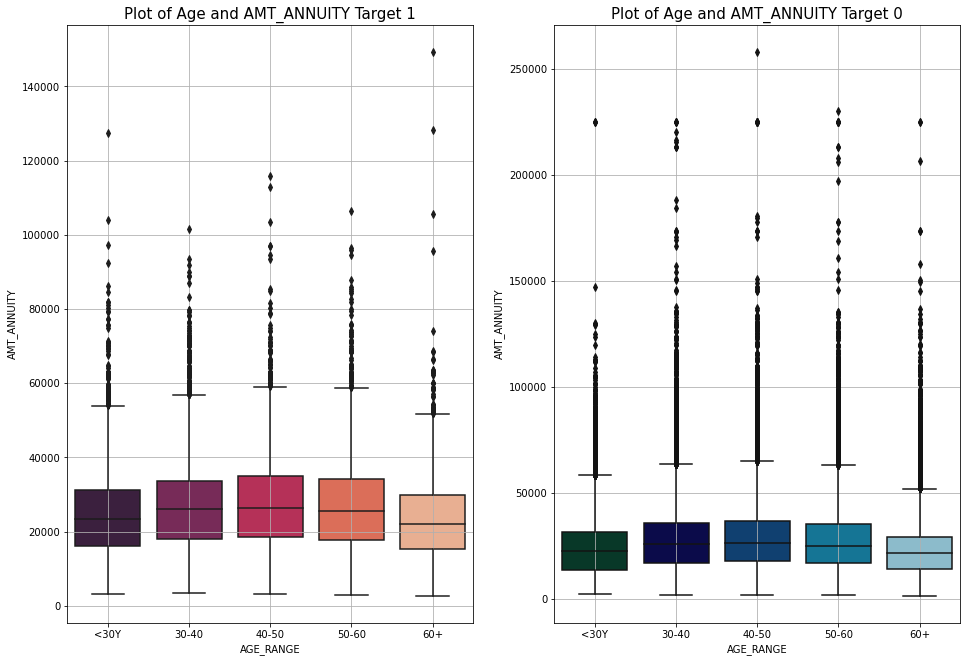

In [45]:
plt.figure(figsize=[16,11])

plt.subplot(1,2,1)
plt.title("Plot of Age and AMT_ANNUITY Target 1" , fontdict={'fontsize': 15, 'color' : 'black'})
sns.boxplot(x = "AGE_RANGE" , y = "AMT_ANNUITY" , data = target_1_data , palette = "rocket")
plt.grid()

plt.subplot(1,2,2)
plt.title("Plot of Age and AMT_ANNUITY Target 0" , fontdict={'fontsize': 15, 'color' : 'black'})
sns.boxplot(x = "AGE_RANGE" , y = "AMT_ANNUITY" , data = target_0_data ,  palette = 'ocean')
plt.grid()

plt.show()

- Considering the age ranges, people having Amount Annuity more than 150000 are more likely to bhe able to to face no payment issues, hence they are in Target 0 category


### 2.2.4 Bivariate Analysis for Continuous ~ Continuous Data

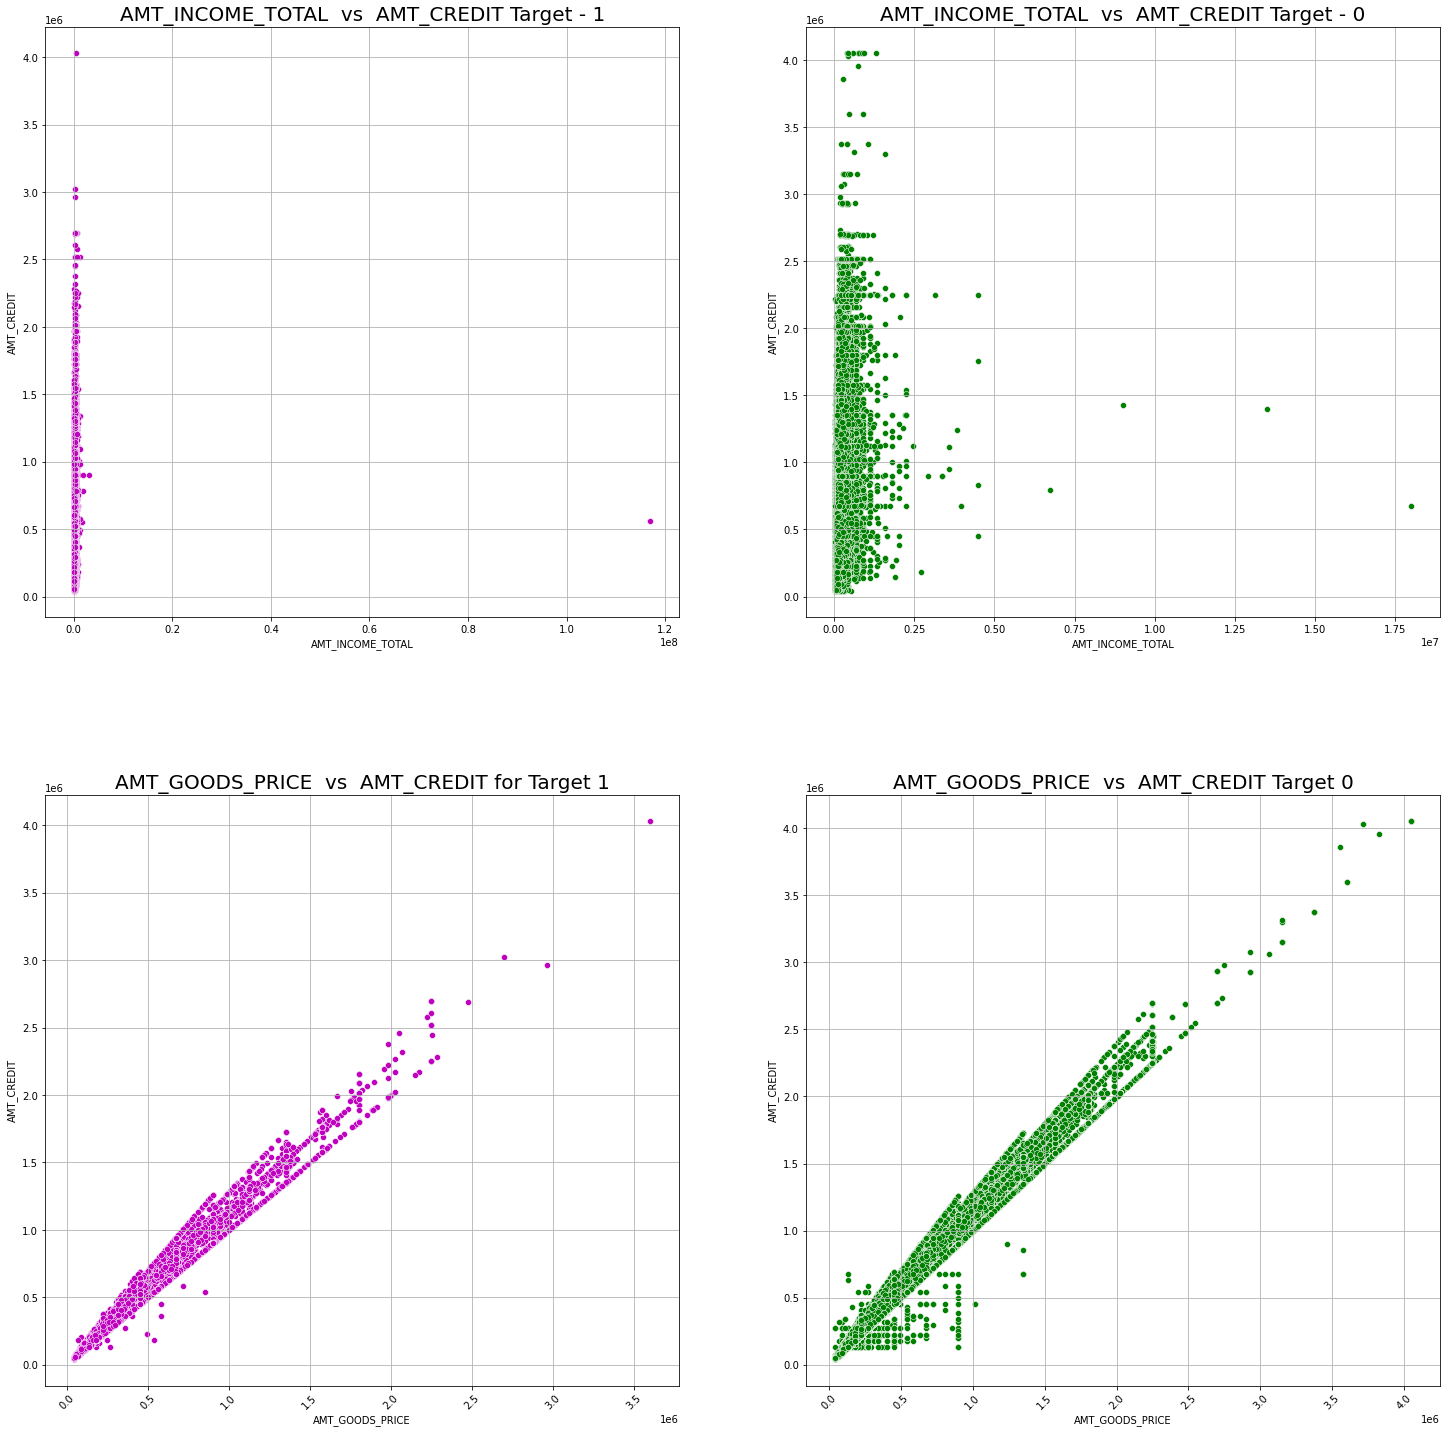

In [46]:
plt.figure(figsize = (25, 25))
plt.subplots_adjust(hspace=0.3)

plt.subplot(2,2,1)
sns.scatterplot(target_1_data.AMT_INCOME_TOTAL,target_1_data.AMT_CREDIT, color = "m")
plt.xlabel('AMT_INCOME_TOTAL', fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT Target - 1' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(2,2,2)
sns.scatterplot(target_0_data.AMT_INCOME_TOTAL,target_0_data.AMT_CREDIT, color = "green")
plt.xlabel('AMT_INCOME_TOTAL' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT Target - 0' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(2,2,3)
sns.scatterplot(target_1_data.AMT_GOODS_PRICE,target_1_data.AMT_CREDIT, color = "m")
plt.xlabel('AMT_GOODS_PRICE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT for Target 1' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.xticks(rotation = 45)
plt.grid()

plt.subplot(2,2,4)
sns.scatterplot(target_0_data.AMT_GOODS_PRICE,target_0_data.AMT_CREDIT, color = "green")
plt.xlabel('AMT_GOODS_PRICE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT Target 0' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.xticks(rotation = 45)
plt.grid()

plt.show()

- We can see a clear direct proportionality between Amount Credit and Goods Price which implies, credit amount depends on the goods price
- For people with payment difficulties, ie Target 1 , they are likely to have comparatively less total income than those in Target 0
- We can see a sort of linear relation between Amount Goods Price and Amount credit for both target 1 and target 0

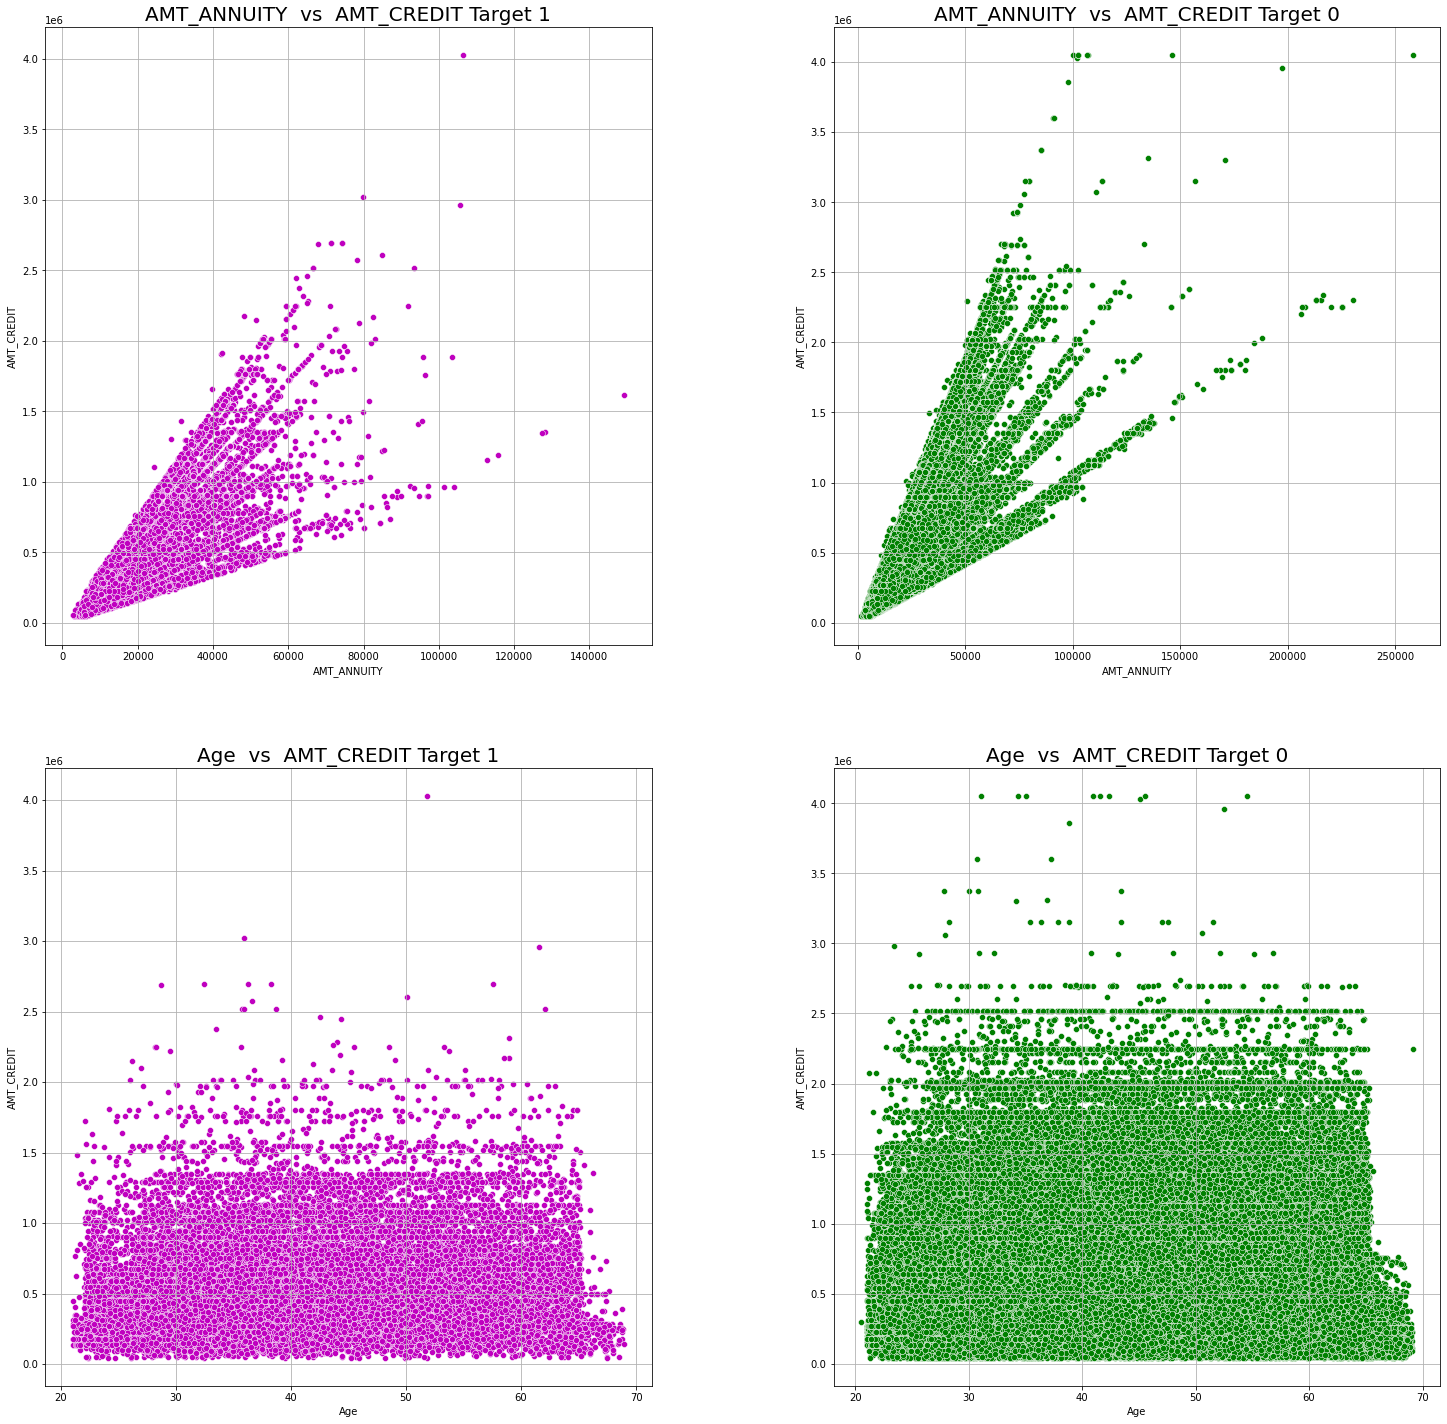

In [47]:
plt.figure(figsize = (25, 25))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,1)
sns.scatterplot(target_1_data.AMT_ANNUITY,target_1_data.AMT_CREDIT, color = "m")
plt.xlabel('AMT_ANNUITY' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_ANNUITY  vs  AMT_CREDIT Target 1' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(2,2,2)
sns.scatterplot(target_0_data.AMT_ANNUITY,target_0_data.AMT_CREDIT, color = "green")
plt.xlabel('AMT_ANNUITY' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_ANNUITY  vs  AMT_CREDIT Target 0' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(2,2,3)
sns.scatterplot(target_1_data.DAYS_BIRTH/365,target_1_data.AMT_CREDIT,color = "m")
plt.xlabel('Age' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Age  vs  AMT_CREDIT Target 1' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(2,2,4)
sns.scatterplot(target_0_data.DAYS_BIRTH/365,target_0_data.AMT_CREDIT,color = "green")
plt.xlabel('Age' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Age  vs  AMT_CREDIT Target 0' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})

plt.grid()

plt.show()

- Clearly, Amount Credit and Amount Annuity are directly proportional with people in Target 0 having upto higher Amount Annuity and Amount credit as compared with Target 1
- Age and Amount Credit are less co-related

### 2.2.5 Bivariate Analysis for Categorical ~ Categorical Data

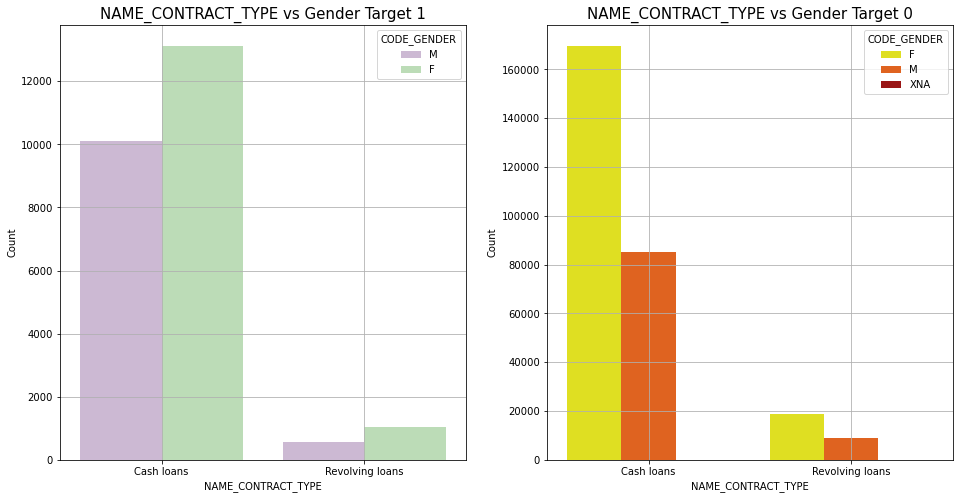

In [48]:
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.countplot("NAME_CONTRACT_TYPE" , hue = 'CODE_GENDER' , data = target_1_data , palette = "PRGn")
plt.xlabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_CONTRACT_TYPE vs Gender Target 1' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(1,2,2)
sns.countplot("NAME_CONTRACT_TYPE" , hue = 'CODE_GENDER' , data = target_0_data , palette = "hot_r" )
plt.xlabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_CONTRACT_TYPE vs Gender Target 0' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

- People are more likely to take Cash loans than Revolving loans
- Females in both cases are more likely to take loans than the males, almost double in Target 0 category 

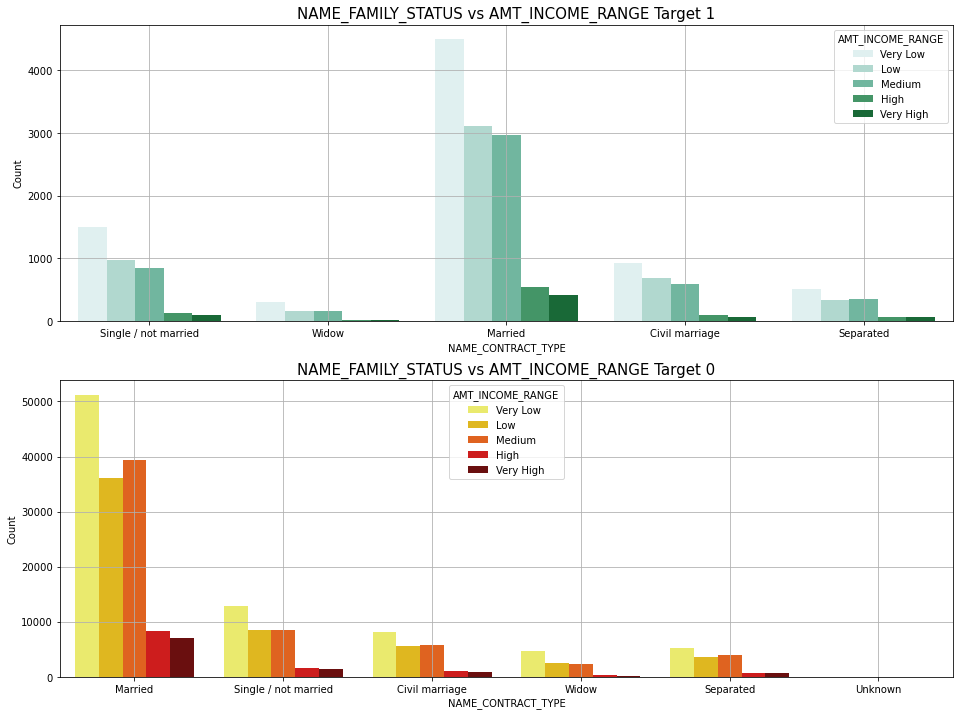

In [49]:
plt.figure(figsize=[16,12])

plt.subplot(2,1,1)
sns.countplot("NAME_FAMILY_STATUS" , hue = 'AMT_INCOME_RANGE' , data = target_1_data , palette = "BuGn")
plt.xlabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_FAMILY_STATUS vs AMT_INCOME_RANGE Target 1' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(2,1,2)
sns.countplot("NAME_FAMILY_STATUS" , hue = 'AMT_INCOME_RANGE' , data = target_0_data , palette = "hot_r" )
plt.xlabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_FAMILY_STATUS vs AMT_INCOME_RANGE Target 0' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

- Married and Very Low income people are most likely to apply for the loans
- Widows are least likely to apply for loans
- Out of the very high income, most are married

### 2.3 Finding top correlations

#### Note:
Since we have done binning, and made up some columns by clubbing certain data, which was added up to the end, let us ignore the last 6 columns for our analysis. Hence here we would be using the data set from 0th col to -6th col for analysis

In [50]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOT_DOCS_SUBMITTED,TOT_COMM_DETAILS,AMT_ANNUITY_RANGE,AMT_INCOME_RANGE,AGE_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,Laborers,1.0,2,2,WEDNESDAY,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4,Very Low,Medium,<30Y,Very Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,Core staff,2.0,1,1,MONDAY,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,Medium,Medium,40-50,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,Laborers,1.0,2,2,MONDAY,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,NaN,NaN,50-60,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,Laborers,2.0,2,2,WEDNESDAY,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,1,3,Low,Very Low,50-60,Very Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,Core staff,1.0,2,2,THURSDAY,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,Very Low,Very Low,50-60,Very Low


In [51]:
app_data.iloc[:,:-6].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,Laborers,1.0,2,2,WEDNESDAY,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,Core staff,2.0,1,1,MONDAY,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,Laborers,1.0,2,2,MONDAY,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,Laborers,2.0,2,2,WEDNESDAY,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,Core staff,1.0,2,2,THURSDAY,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Note:
- While finding all correlations, the maximum correlation would be <b>1</b>.
- Basically, one column's correlation with itself would also result in <b>1</b>, ie the main diagonal always results with 1
- So, in order to get the top correlations we have to ignore the main diagonal as done below:

In [52]:
corr_app = app_data.iloc[:,:-6].corr()
corr_values = corr_app.where(np.triu(np.ones(corr_app.shape) , k = 1 ).astype (np.bool))
corr_values = corr_values.unstack().reset_index()
corr_values.columns = ['Column_1' , 'Column_2' , 'Correlation']
corr_values.dropna(subset = ['Correlation'] , inplace = True)
corr_values['Correlation'] = round(corr_values['Correlation'],2).abs()
corr_values.sort_values(by = 'Correlation' , ascending = False).head(10)

,Column_1,Column_2,Correlation
373,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
148,AMT_GOODS_PRICE,AMT_CREDIT,0.99
299,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
242,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
398,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
124,AMT_ANNUITY,AMT_CREDIT,0.77
199,DAYS_EMPLOYED,DAYS_BIRTH,0.62
374,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.33
170,DAYS_BIRTH,CNT_CHILDREN,0.33


##### Now let us find the most correlated values in the separate targets

In [53]:
corr_app_1 = target_1_data.iloc[:,:-6].corr()
corr_values_1 = corr_app_1.where(np.triu(np.ones(corr_app_1.shape) , k = 1 ).astype (np.bool))
corr_values_1 = corr_values_1.unstack().reset_index()
corr_values_1.columns = ['Column_1' , 'Column_2' , 'Correlation']
corr_values_1.dropna(subset = ['Correlation'] , inplace = True)
corr_values_1['Correlation'] = round(corr_values_1['Correlation'],2).abs()
corr_values_1.sort_values(by = 'Correlation' , ascending = False).head(10)

,Column_1,Column_2,Correlation
373,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
148,AMT_GOODS_PRICE,AMT_CREDIT,0.98
299,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
242,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
398,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
124,AMT_ANNUITY,AMT_CREDIT,0.75
199,DAYS_EMPLOYED,DAYS_BIRTH,0.58
374,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34
349,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33


In [54]:
corr_app_0 = target_0_data.iloc[:,:-6].corr()
corr_values_0 = corr_app_0.where(np.triu(np.ones(corr_app_0.shape) , k = 1 ).astype (np.bool))
corr_values_0 = corr_values_0.unstack().reset_index()
corr_values_0.columns = ['Column_1' , 'Column_2' , 'Correlation']
corr_values_0.dropna(subset = ['Correlation'] , inplace = True)
corr_values_0['Correlation'] = round(corr_values_0['Correlation'],2).abs()
corr_values_0.sort_values(by = 'Correlation' , ascending = False).head(10)

,Column_1,Column_2,Correlation
373,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
148,AMT_GOODS_PRICE,AMT_CREDIT,0.99
299,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
242,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
398,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
124,AMT_ANNUITY,AMT_CREDIT,0.77
199,DAYS_EMPLOYED,DAYS_BIRTH,0.63
123,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
147,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35


- Here we can see that there is a very high correlation between OBS_60_CNT_SOCIAL_CIRCLE and	OBS_30_CNT_SOCIAL_CIRCLE	
- Followed by AMT_GOODS_PRICE and AMT_CREDIT 

Which shows the proportionality and the relation between them

### 3. Reading and analyzing data in Previous Application Data

In [55]:
prev_data = pd.read_csv("previous_application.csv")
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

<b>Note:</b>
Upon checking the data we found many values as <b>XNA</b>, so we are here taking it and filling with <b>NaN</b>

In [57]:
prev_data.replace(to_replace = "XNA" , value = NaN , inplace = True)

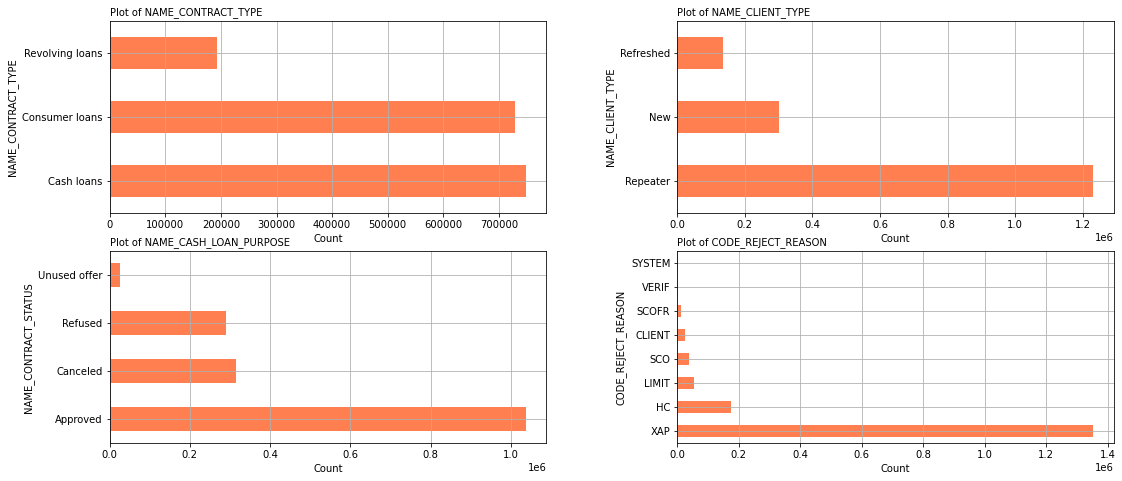

In [58]:
plt.figure(figsize=[18,12])
plt.subplots_adjust(wspace=0.3)

plt.subplot(3,2,1)
prev_data["NAME_CONTRACT_TYPE"].value_counts().plot.barh(color = "coral")
plt.ylabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()

plt.subplot(3,2,2)
prev_data["NAME_CLIENT_TYPE"].value_counts().plot.barh(color = "coral")
plt.ylabel('NAME_CLIENT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of NAME_CLIENT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()

plt.subplot(3,2,3)
prev_data["NAME_CONTRACT_STATUS"].value_counts().plot.barh(color = "coral")
plt.ylabel('NAME_CONTRACT_STATUS' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of NAME_CASH_LOAN_PURPOSE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()

plt.subplot(3,2,4)
prev_data["CODE_REJECT_REASON"].value_counts().plot.barh(color = "coral")
plt.ylabel('CODE_REJECT_REASON' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of CODE_REJECT_REASON' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()


plt.show()

- We can see that most of the applied loans were <b>Approved</b> in the past.
- Rejection reason is most likely <b>XAP</b>
- Most of the clients have been <b>Repeaters</b>
- Least customers have rejected their offer after it was approved

### 3.1 Merging the datasets

<b>Note:</b>
For merging the data sets we are considering Left join on SK_ID_CURR, taking Application Data into priority,since we are specific to the data set while Previous Application dataset is more like a master dataset

In [59]:
merged_data=pd.merge(app_data,prev_data,how='left',on='SK_ID_CURR',suffixes=('_current','_previous'))
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_current,AMT_ANNUITY_current,AMT_GOODS_PRICE_current,NAME_TYPE_SUITE_current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_current,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOT_DOCS_SUBMITTED,TOT_COMM_DETAILS,AMT_ANNUITY_RANGE,AMT_INCOME_RANGE,AGE_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_previous,AMT_ANNUITY_previous,AMT_APPLICATION,AMT_CREDIT_previous,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_previous,WEEKDAY_APPR_PROCESS_START_previous,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,Laborers,1.0,2,2,WEDNESDAY,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4,Very Low,Medium,<30Y,Very Low,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,NaN,XAP,NaN,New,Vehicles,POS,NaN,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,Core staff,2.0,1,1,MONDAY,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,Medium,Medium,40-50,High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,-746.0,NaN,XAP,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.0,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,Core staff,2.0,1,1,MONDAY,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,Medium,Medium,40-50,High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,NaN,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,Core staff,2.0,1,1,MONDAY,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,Medium,Medium,40-50,High,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,Laborers,1.0,2,2,MONDAY,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.

In [60]:
merged_data.shape

(1430155, 78)

In [61]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 78 columns):
 #   Column                               Non-Null Count    Dtype   
---  ------                               --------------    -----   
 0   SK_ID_CURR                           1430155 non-null  int64   
 1   TARGET                               1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_current           1430155 non-null  object  
 3   CODE_GENDER                          1430155 non-null  object  
 4   FLAG_OWN_CAR                         1430155 non-null  object  
 5   FLAG_OWN_REALTY                      1430155 non-null  object  
 6   CNT_CHILDREN                         1430155 non-null  int64   
 7   AMT_INCOME_TOTAL                     1430155 non-null  float64 
 8   AMT_CREDIT_current                   1430155 non-null  float64 
 9   AMT_ANNUITY_current                  1430062 non-null  float64 
 10  AMT_GOODS_PRICE_current              1428936 non-null 

<b>Note:</b>
There are many fields marked as <b>XNA</b> and we are not sure or aware of the data they contain.
So we are marking them as <b>NaN</b> for now in order to ease our analysis

In [62]:
merged_data.replace(to_replace = "XNA" , value = NaN , inplace = True)

### 3.2 Analyzing the data

### 3.2.1 Univariate Analysis Categorical data

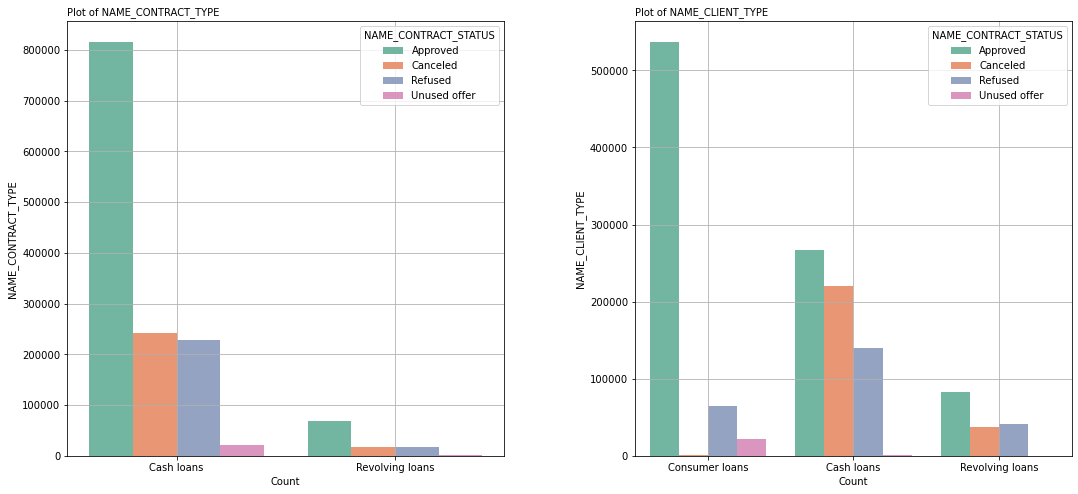

In [63]:
plt.figure(figsize=[18,8])
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.countplot("NAME_CONTRACT_TYPE_current" , hue = 'NAME_CONTRACT_STATUS' , data = merged_data , palette = "Set2")
plt.ylabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()

plt.subplot(1,2,2)
sns.countplot("NAME_CONTRACT_TYPE_previous" , hue = 'NAME_CONTRACT_STATUS' , data = merged_data , palette = "Set2")
plt.ylabel('NAME_CLIENT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of NAME_CLIENT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()

plt.show()

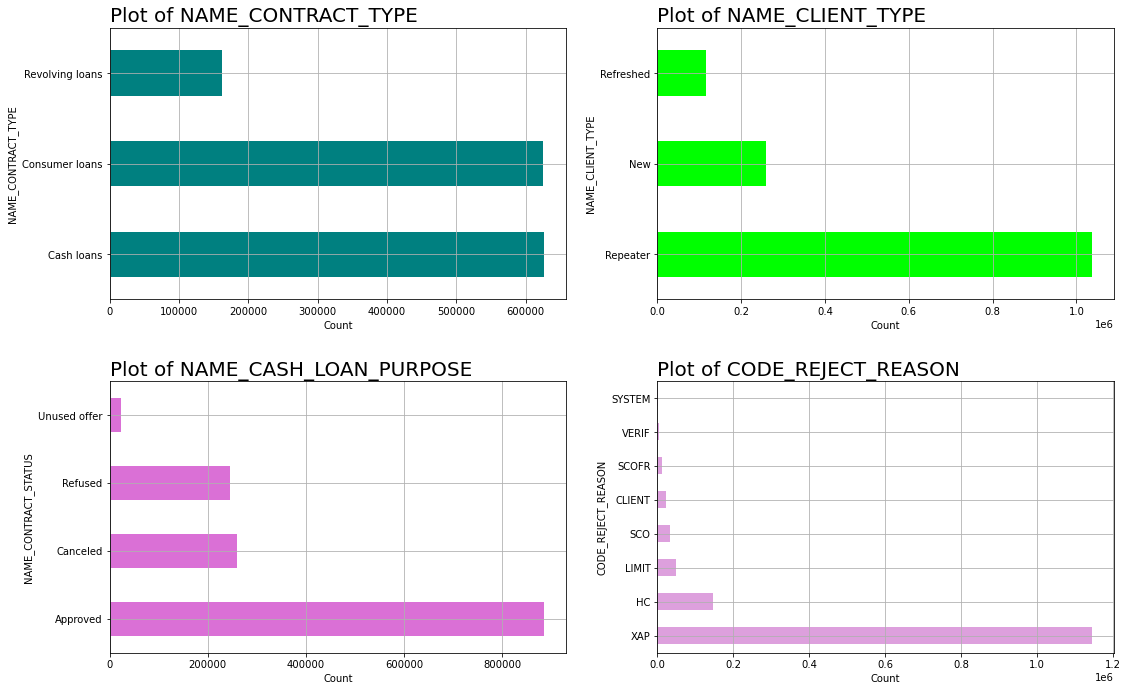

In [64]:
plt.figure(figsize=[18,18])
plt.subplots_adjust(hspace=0.3)

plt.subplot(3,2,1)
merged_data["NAME_CONTRACT_TYPE_previous"].value_counts().plot.barh(color = "teal")
plt.ylabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of NAME_CONTRACT_TYPE' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()

plt.subplot(3,2,2)
merged_data["NAME_CLIENT_TYPE"].value_counts().plot.barh(color = "lime")
plt.ylabel('NAME_CLIENT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of NAME_CLIENT_TYPE' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()

plt.subplot(3,2,3)
merged_data["NAME_CONTRACT_STATUS"].value_counts().plot.barh(color = "orchid")
plt.ylabel('NAME_CONTRACT_STATUS' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of NAME_CASH_LOAN_PURPOSE' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()

plt.subplot(3,2,4)
merged_data["CODE_REJECT_REASON"].value_counts().plot.barh(color = "plum")
plt.ylabel('CODE_REJECT_REASON' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.xlabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('Plot of CODE_REJECT_REASON' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'}, loc = "left")
plt.grid()


plt.show()

- Almost equal number of <b>Cash Loans</b> and <b>Consumer Loans</b> have been applied for; Least <b>Revolving Loans</b> have been applied for
- We can see that most of the applied loans were <b>Approved</b> in the past.
- Rejection reason is most likely <b>XAP</b>
- Most of the clients have been <b>Repeaters</b>
- Least customers have rejected their offer after it was approved

### 3.2.2 Univariate Analysis Continuous data

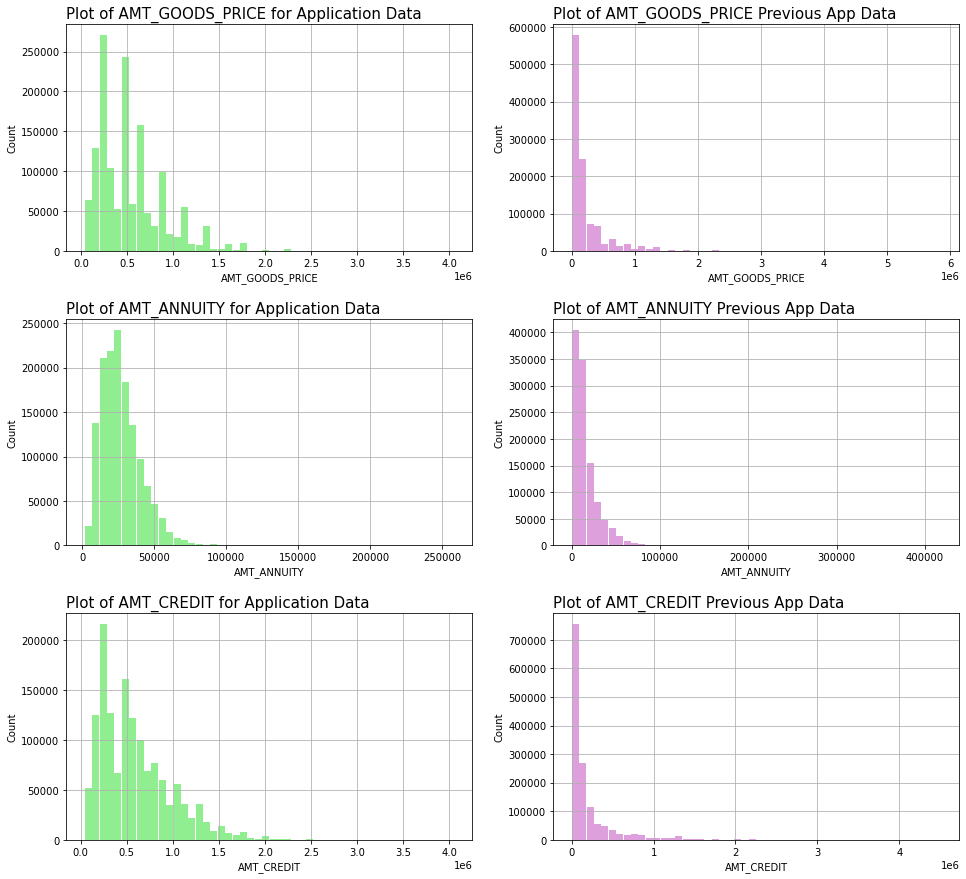

In [65]:
plt.figure(figsize=[16,15])
plt.subplots_adjust(hspace=0.3)

subplot(3,2,1)
plt.hist(merged_data['AMT_GOODS_PRICE_current'] , bins = 50 , color = "lightgreen" , rwidth = 0.95)
plt.title("Plot of AMT_GOODS_PRICE for Application Data", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_GOODS_PRICE" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(3,2,2)
plt.hist(merged_data['AMT_GOODS_PRICE_previous'] , bins = 50 , color = "plum" , rwidth = 0.95)
plt.title("Plot of AMT_GOODS_PRICE Previous App Data", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_GOODS_PRICE" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(3,2,3)
plt.hist(merged_data['AMT_ANNUITY_current'] , bins = 50 , color = "lightgreen" , rwidth = 0.95)
plt.title("Plot of AMT_ANNUITY for Application Data", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_ANNUITY" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(3,2,4)
plt.hist(merged_data['AMT_ANNUITY_previous'] , bins = 50 , color = "plum" , rwidth = 0.95)
plt.title("Plot of AMT_ANNUITY Previous App Data", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_ANNUITY" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(3,2,5)
plt.hist(merged_data['AMT_CREDIT_current'] , bins = 50 , color = "lightgreen" , rwidth = 0.95)
plt.title("Plot of AMT_CREDIT for Application Data", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_CREDIT" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

subplot(3,2,6)
plt.hist(merged_data['AMT_CREDIT_previous'] , bins = 50 , color = "plum" , rwidth = 0.95)
plt.title("Plot of AMT_CREDIT Previous App Data", fontdict={'fontsize': 15, 'color' : 'black'} , loc = "left")
plt.xlabel("AMT_CREDIT" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel("Count" ,  fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.show()

Here we can notice a clear difference for the columns:
- AMT_CREDIT - For application data, most of the amounts lie in the range upto 2000000 while we can clearly see that most people in previous applications have the amounts more in the range upto 15000000
- AMT_ANNUITY - For both the data, Amount Annuity has been pretty similar but in previous data, there are extreme outliers
- AMT_GOODS_PRICE - For both the data, Amount of Goods has been pretty similar but in previous data, there are more outliers

### 3.2.3 Bivariate Analysis for Continuous ~ Categorical Data


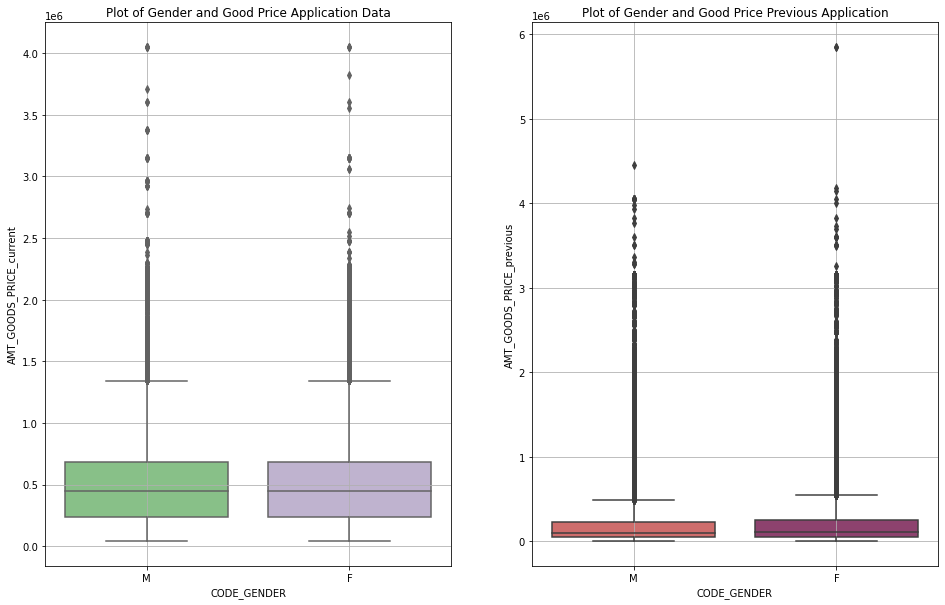

In [66]:
plt.figure(figsize=[16,10])

plt.subplot(1,2,1)
plt.title("Plot of Gender and Good Price Application Data")
sns.boxplot(x = "CODE_GENDER" , y = "AMT_GOODS_PRICE_current" , data = merged_data , palette = "Accent")
plt.grid()

plt.subplot(1,2,2)
plt.title("Plot of Gender and Good Price Previous Application")
sns.boxplot(x = "CODE_GENDER" , y = "AMT_GOODS_PRICE_previous" , data = merged_data ,  palette = 'flare')
plt.grid()

plt.show()

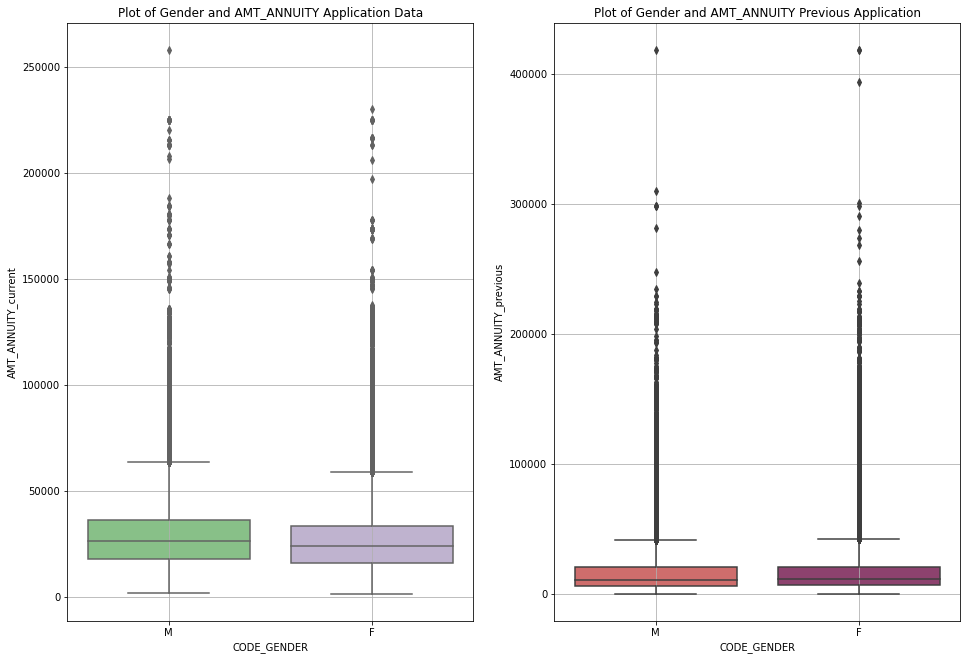

In [67]:
plt.figure(figsize=[16,11])

plt.subplot(1,2,1)
plt.title("Plot of Gender and AMT_ANNUITY Application Data")
sns.boxplot(x = "CODE_GENDER" , y = "AMT_ANNUITY_current" , data = merged_data , palette = "Accent")
plt.grid()

plt.subplot(1,2,2)
plt.title("Plot of Gender and AMT_ANNUITY Previous Application")
sns.boxplot(x = "CODE_GENDER" , y = "AMT_ANNUITY_previous" , data = merged_data ,  palette = 'flare')
plt.grid()

plt.show()

We can see here tha:
- In application data, males and females are likely to have applied with max Goods Price ranging till more than 400000
while in Previous Application data, max values for females are ranging upto more than 500000
- There are comparatively more outliers for the Previous Application data considering Gender vs Goods Price
- in Application data, max Annuity Amounts have been for Males ranging upto 250000 and more while in Previous Applications, males and females both are having max Annuity amounts ranging more than 400000.
- There are many outliers for Amount Annuity in Previous data


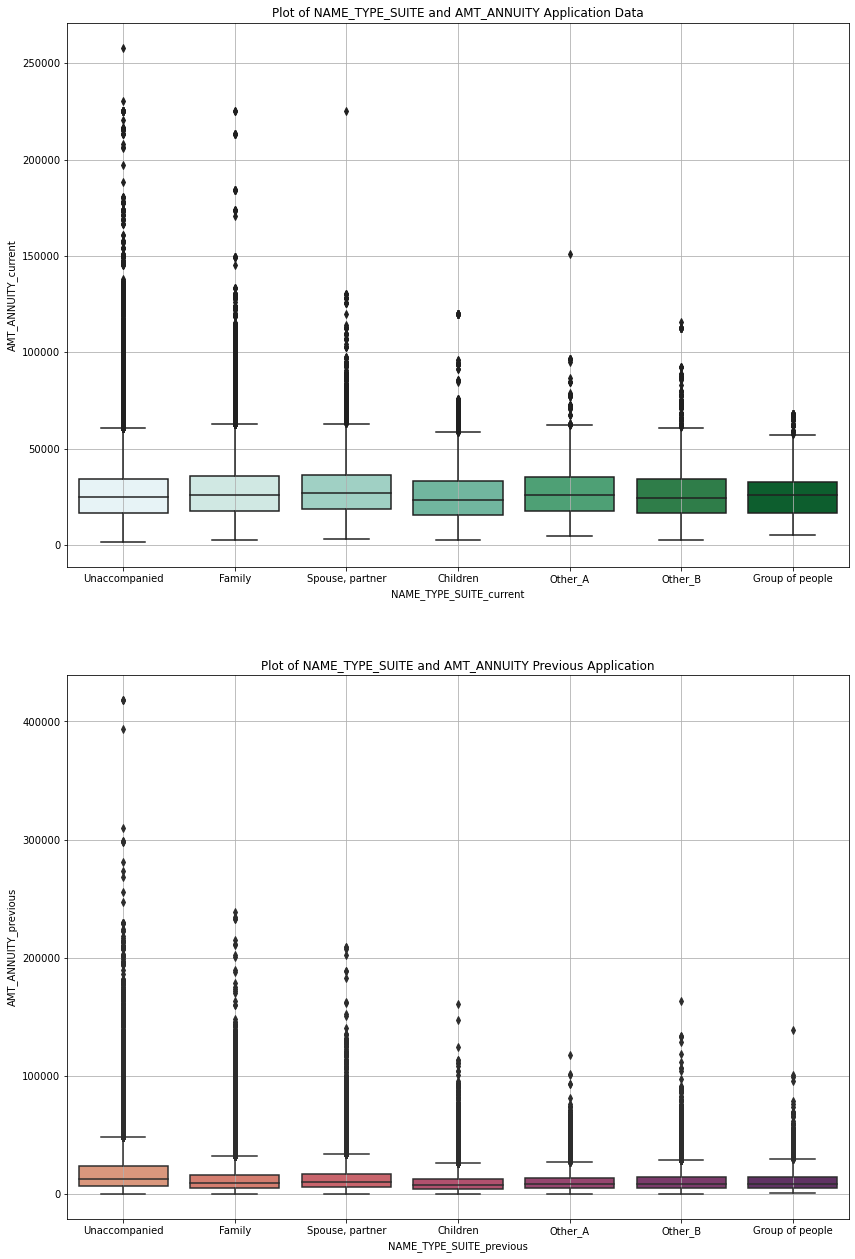

In [68]:
plt.figure(figsize=[14,22])

plt.subplot(2,1,1)
plt.title("Plot of NAME_TYPE_SUITE and AMT_ANNUITY Application Data")
sns.boxplot(x = "NAME_TYPE_SUITE_current" , y = "AMT_ANNUITY_current" , data = merged_data , palette = "BuGn")
plt.grid()

plt.subplot(2,1,2)
plt.title("Plot of NAME_TYPE_SUITE and AMT_ANNUITY Previous Application")
sns.boxplot(x = "NAME_TYPE_SUITE_previous" , y = "AMT_ANNUITY_previous" , data = merged_data ,  palette = 'flare')
plt.grid()

plt.show()

Here we can see:
- Group of people are least likely to apply for more Annuity Amounts 
- People having Chiuldren are having moderate amounts for annuity amounts
- Max annuity for Application data was in the range upto 250000 and more while for Previous Application, max ranges are upto more than 4000000

### 3.2.4 Bivariate Analysis for Continuous ~ Continuous Data

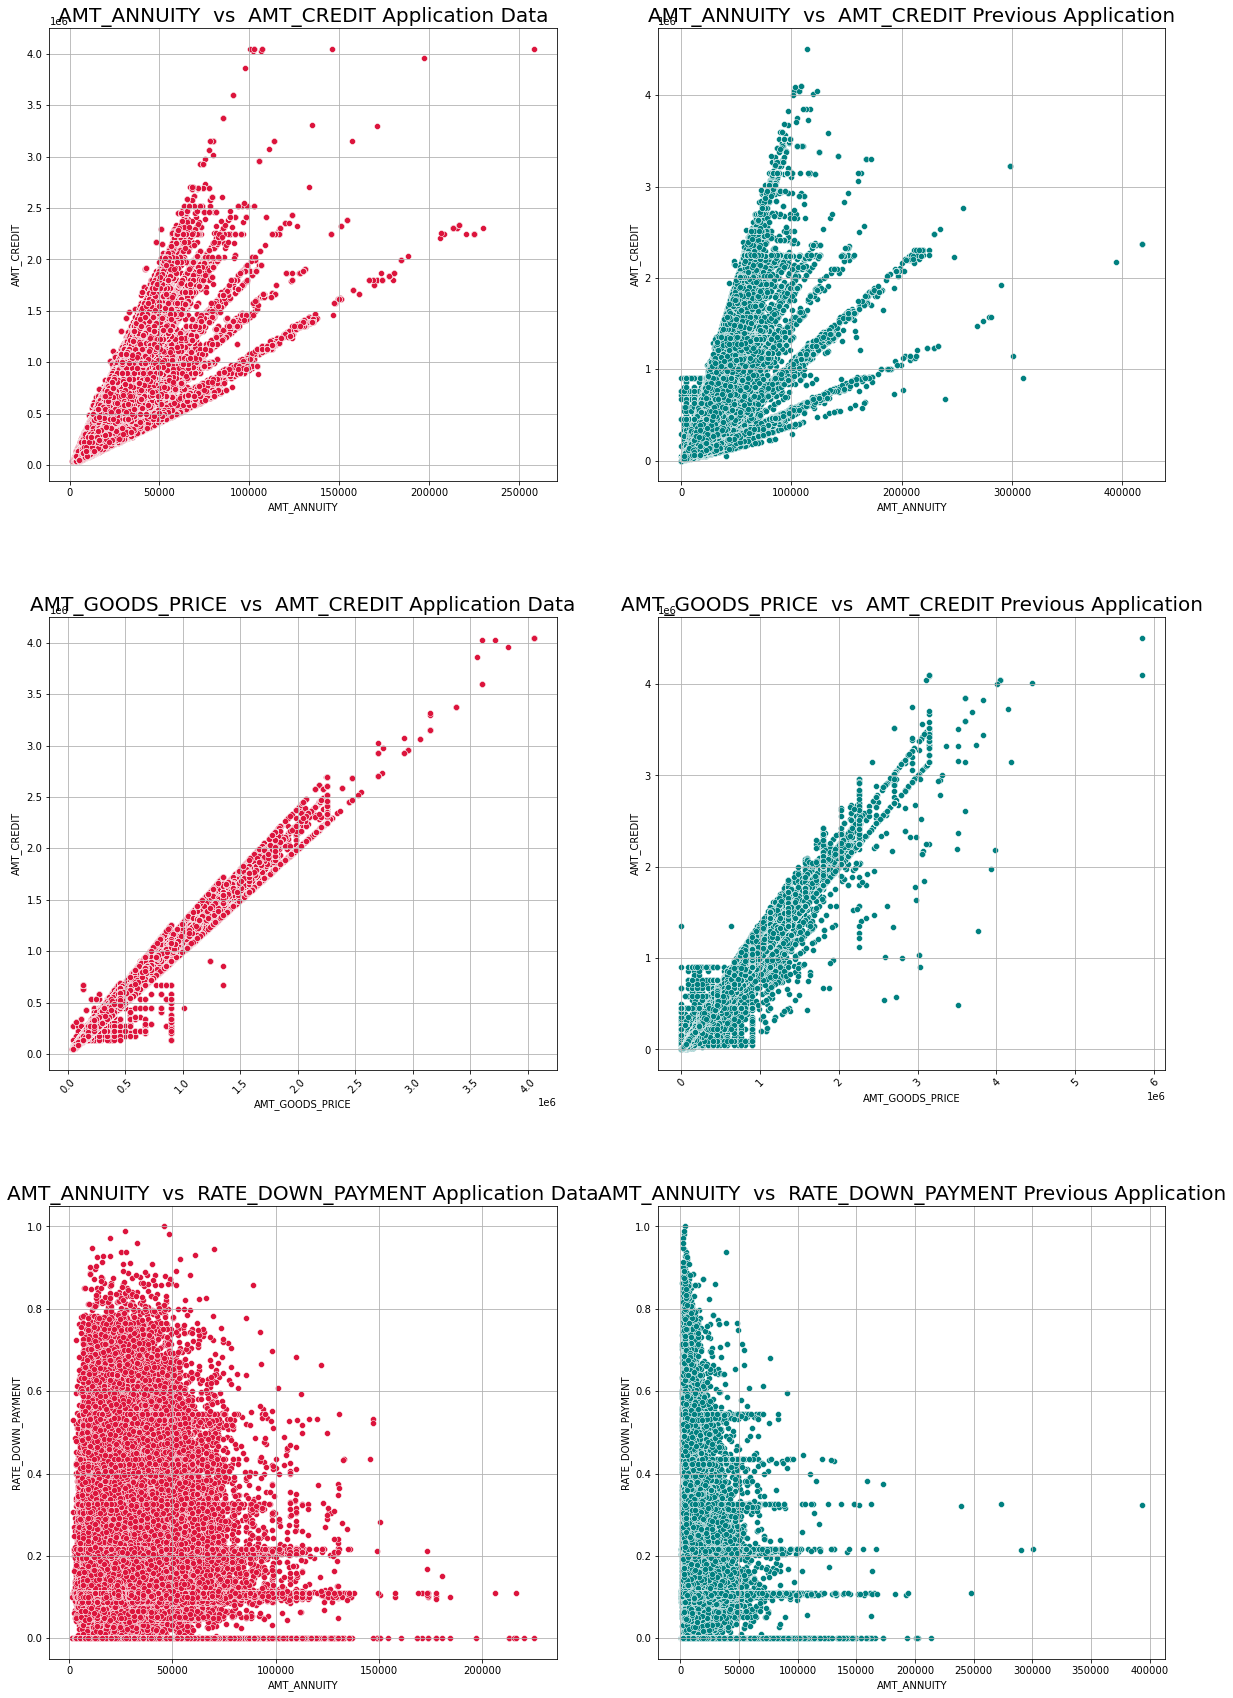

In [69]:
plt.figure(figsize = (20,30))
plt.subplots_adjust(hspace=0.3)

plt.subplot(3,2,1)
sns.scatterplot(merged_data.AMT_ANNUITY_current,merged_data.AMT_CREDIT_current, color = "crimson")
plt.xlabel('AMT_ANNUITY', fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_ANNUITY  vs  AMT_CREDIT Application Data' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(3,2,2)
sns.scatterplot(merged_data.AMT_ANNUITY_previous,merged_data.AMT_CREDIT_previous, color = "teal")
plt.xlabel('AMT_ANNUITY' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_ANNUITY  vs  AMT_CREDIT Previous Application' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(3,2,3)
sns.scatterplot(merged_data.AMT_GOODS_PRICE_current,merged_data.AMT_CREDIT_current, color = "crimson")
plt.xlabel('AMT_GOODS_PRICE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT Application Data' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.xticks(rotation = 45)
plt.grid()

plt.subplot(3,2,4)
sns.scatterplot(merged_data.AMT_GOODS_PRICE_previous,merged_data.AMT_CREDIT_previous, color = "teal")
plt.xlabel('AMT_GOODS_PRICE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('AMT_CREDIT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT Previous Application' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.xticks(rotation = 45)
plt.grid()

plt.subplot(3,2,5)
sns.scatterplot(merged_data.AMT_ANNUITY_current,merged_data.RATE_DOWN_PAYMENT, color = "crimson")
plt.xlabel('AMT_ANNUITY' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('RATE_DOWN_PAYMENT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_ANNUITY  vs  RATE_DOWN_PAYMENT Application Data' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(3,2,6)
sns.scatterplot(merged_data.AMT_ANNUITY_previous,merged_data.RATE_DOWN_PAYMENT, color = "teal")
plt.xlabel('AMT_ANNUITY' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('RATE_DOWN_PAYMENT' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('AMT_ANNUITY  vs  RATE_DOWN_PAYMENT Previous Application' , fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.show()

- we can see that Amount Annuity is having a good coorelation with Amount Credit in both the case.
- We can notice a linear relation between Amount Goods Price and Amount Credit for both Application data and Previous Application data

### 3.2.4 Bivariate Analysis for Categorical ~ Categorical Data

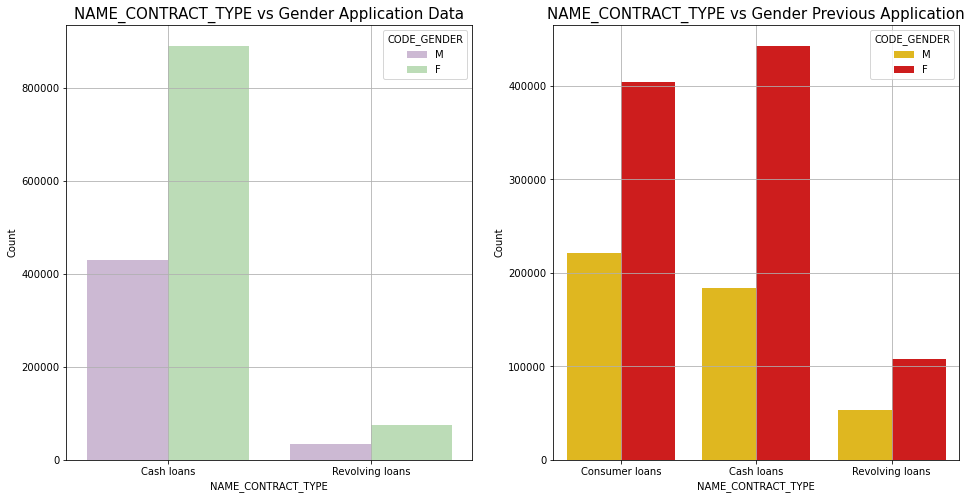

In [70]:
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.countplot("NAME_CONTRACT_TYPE_current" , hue = 'CODE_GENDER' , data = merged_data , palette = "PRGn")
plt.xlabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_CONTRACT_TYPE vs Gender Application Data' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(1,2,2)
sns.countplot("NAME_CONTRACT_TYPE_previous" , hue = 'CODE_GENDER' , data = merged_data , palette = "hot_r" )
plt.xlabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_CONTRACT_TYPE vs Gender Previous Application' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

- Females have more applied for loans aas compared to males
- Cash loans have been more preferable in application data or previous data
- People are least likely to apply for revolving loans

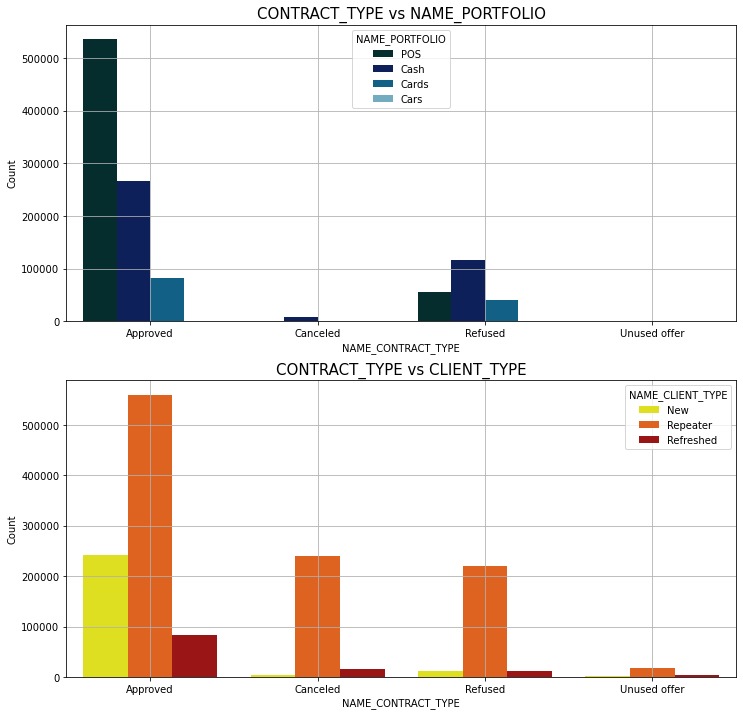

In [71]:
plt.figure(figsize=[12,12])

plt.subplot(2,1,1)
sns.countplot("NAME_CONTRACT_STATUS" , hue = 'NAME_PORTFOLIO' , data = merged_data , palette = "ocean")
plt.xlabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('CONTRACT_TYPE vs NAME_PORTFOLIO' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(2,1,2)
sns.countplot("NAME_CONTRACT_STATUS" , hue = 'NAME_CLIENT_TYPE' , data = merged_data , palette = "hot_r" )
plt.xlabel('NAME_CONTRACT_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('CONTRACT_TYPE vs CLIENT_TYPE' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

- Most people who got their loans approved preferd POS as Portfolio while most people with refused, had cash as portfolio
- Many New people have got their loans approved as compared to cacelled or refused

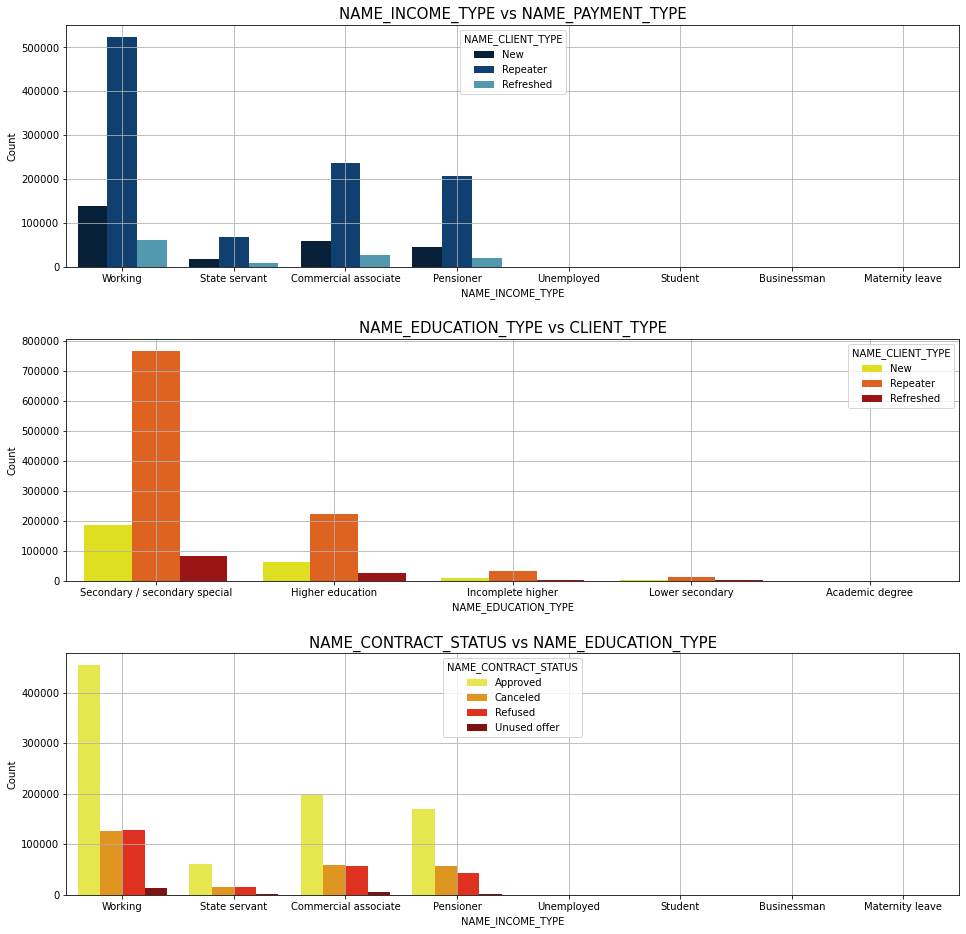

In [72]:
plt.figure(figsize=[16,16])
plt.subplots_adjust(hspace=0.3)

plt.subplot(3,1,1)
sns.countplot("NAME_INCOME_TYPE" , hue = 'NAME_CLIENT_TYPE' , data = merged_data , palette = "ocean")
plt.xlabel('NAME_INCOME_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_INCOME_TYPE vs NAME_PAYMENT_TYPE' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(3,1,2)
sns.countplot("NAME_EDUCATION_TYPE" , hue = 'NAME_CLIENT_TYPE' , data = merged_data , palette = "hot_r" )
plt.xlabel('NAME_EDUCATION_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_EDUCATION_TYPE vs CLIENT_TYPE' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.subplot(3,1,3)
sns.countplot("NAME_INCOME_TYPE" , hue = 'NAME_CONTRACT_STATUS' , data = merged_data , palette = "hot_r" )
plt.xlabel('NAME_INCOME_TYPE' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.ylabel('Count' , fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})
plt.title('NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE' , fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})
plt.grid()

plt.show()

- Repeaters with secondary education have mostly applied for the loan.
- Number of Repeaters is more as compared to New and Refreshed
- People with Academic degree are least likely to apply for loans
- People belong to working class have mostly applied for the loans
- Most of the people who have applied for loans, and are belonging to working, state srvant, pensioner or commercial associate have got their loans approved.